In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load results

In [18]:
path_to_data = '../recipes/echo_aware_processing/results.csv'
results = pd.read_csv(path_to_data)

In [19]:
results

,Unnamed: 0,array,dataset,target_idx,interf_idx,sir,snr,bf,sar_out,sir_in,snr_in,sir_out,snr_out,pesq_in,pesq_out
0,0,0.0,0.0,0.0,2.0,0.0,0.0,dpDS,-6.091475,1.928655e-15,0.016051,-0.059176,4.672636,1.614886,1.816833
1,1,0.0,0.0,0.0,2.0,0.0,0.0,rtfMVDR,11.971988,1.928655e-15,0.016051,11.432435,6.621030,1.614886,1.958202
2,2,0.0,0.0,0.0,2.0,0.0,0.0,ecoMVDR,6.053983,1.928655e-15,0.016051,10.510525,9.300582,1.614886,2.085810
3,3,0.0,0.0,0.0,2.0,0.0,0.0,rtfLCMV,7.977399,1.928655e-15,0.016051,8.632972,7.999073,1.614886,1.959983
4,4,0.0,0.0,0.0,2.0,0.0,0.0,ecoLCMV,5.963674,1.928655e-15,0.016051,29.405838,8.793940,1.614886,2.181317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,3370,4.0,4.0,3.0,2.0,20.0,20.0,dpDS,-8.752221,2.000000e+01,20.001639,23.345647,25.529789,2.924342,3.117394
3371,3371,4.0,4.0,3.0,2.0,20.0,20.0,rtfMVDR,7.795761,2.000000e+01,20.001639,31.243073,27.946180,2.924342,3.134702
3372,3372,4.0,4.0,3.0,2.0,20.0,20.0,ecoMVDR,6.323572,2.000000e+01,20.001639,30.210212,28.932487,2.924342,3.132622
3373,3373,4.0,4.0,3.0,2.0,20.0,20.0,rtfLCMV,6.793813,2.000000e+01,20.001639,30.976593,27.812204,2.924342,3.163656


# Investigation

## Global metrics vs bf

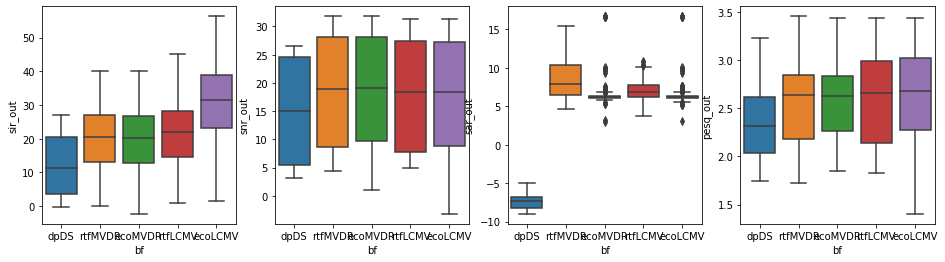

In [27]:
# filter
loc_res = results.copy()
# plot
plt.figure(figsize=(16,4))
plt.subplot(141)
sns.boxplot(x='bf', y="sir_out",
            data=loc_res)
plt.subplot(142)
sns.boxplot(x='bf', y="snr_out",
            data=loc_res)
plt.subplot(143)
sns.boxplot(x='bf', y="sar_out",
            data=loc_res)
plt.subplot(144)
sns.boxplot(x='bf', y="pesq_out",
            data=loc_res)
plt.show()

## Incemental metrics vs bf

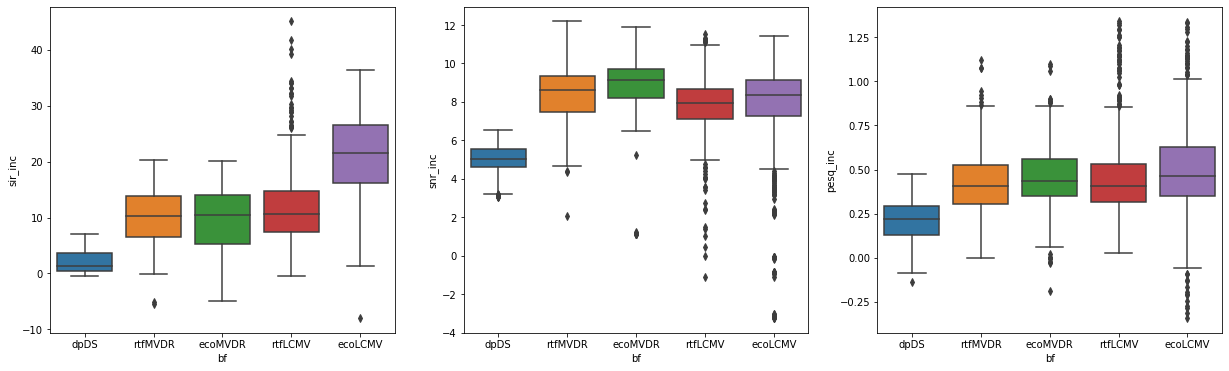

In [46]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x='bf', y="sir_inc",
            data=loc_res)
plt.subplot(132)
sns.boxplot(x='bf', y="snr_inc",
            data=loc_res)
plt.subplot(133)
sns.boxplot(x='bf', y="pesq_inc",
            data=loc_res)
plt.show()

# Performance vs Dataset (~ RT60)

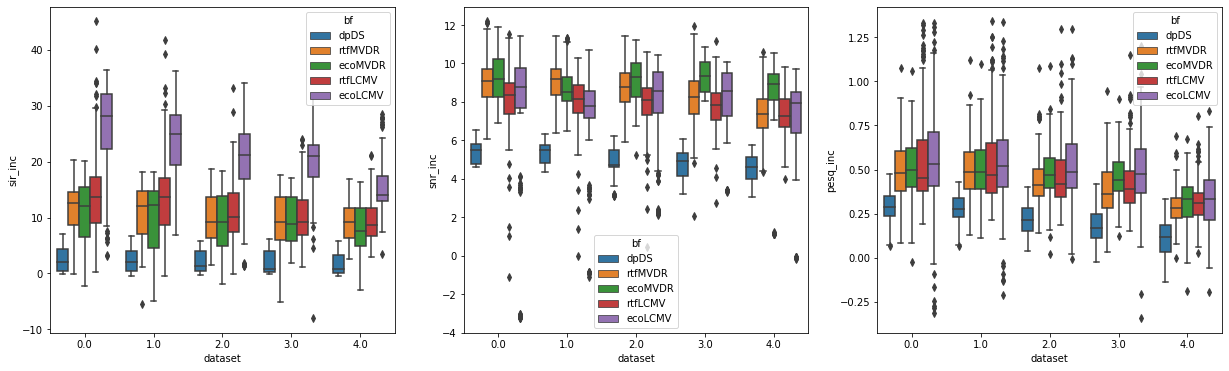

In [45]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'dataset'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABM0AAAFzCAYAAAAt0v5aAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOzdfXyU5Zn3/8+ZB4GAyMNIsIw0CKEFNWJLpb27UKgGDdvSlttWWNwON7Vw16142+1v79VSgS7rw93tq91YXaHWH+nKEq3eq6GQQmRBsVv5VWvAx5qgWQwKmFDkIQEmyfn7YzLDTDKZzISZuWbm+r5fr7zkvObKlTNjkpnzuI7jOI21FhERERERERERETknz+kJiIiIiIiIiIiIZBoFzURERERERERERHpQ0ExERERERERERKQHBc1ERERERERERER6UNBMRERERERERESkBwXNREREREREREREeihwegLJ4vF4bElJidPTEBHJSS+//HKLtfZip+eRSfS6IyKSGnrN6U2vOSIiqRPrdSdngmYlJSW89NJLTk9DRCQnGWP+y+k5ZBq97oiIpIZec3rTa46ISOrEet1ReaaIiIiIiIiIiEgPCpqJiIiIiIiIiIj0oKCZiIiIiIiIiIhIDznT00xE3Mvv99Pc3Mzp06ednkrWGzx4MF6vl8LCQqenIiIiIiLielrrJM9A1joKmolI1mtububCCy+kpKQEY4zT08la1lpaW1tpbm5mwoQJTk9HRERERMT1tNZJjoGudVSeKSJZ7/Tp04wePVovIufJGMPo0aN1F0tEREREJENorZMcA13rKGgmIjlBLyLJoedRRERERCSz6D16cgzkeVTQTEQkRZqamrjiiit6Hd+9ezeXX34506ZNo7293YGZiYiIiIiIDJxb1joKmjmopaWF2267jdbWVqenIiJptHHjRu68807q6+sZMmSI09ORDKPXBhERkdyk13hxg1xb6yho5qCqqir27dtHVVWV01MRkRTp6Ohg8eLFTJkyhRtvvJHKykqeeOIJfvjDH7J48WKnpycZSK8NIiIiuSmR13gF2CQbuGGto6CZQ1paWqitrcVaS21trf4YiuSoP/3pT9x66628+eabDB8+nLNnzzJ//nx+/OMfs3HjRqenJxmmpaWFrVu3Yq1ly5Ytem0QEZGslUjQxw0BokTXf7qJJtnADWsdBc0cUlVVhbUWgK6uLv0xFMlRl156KZ///OcBuPnmm3nhhRccnpFksqqqKvx+PwB+v1+vDSIikrUSCfq4IUCUyPpPCRaSLdyw1lHQzCF1dXURC6Pt27c7PCMRSYWeO7Ro5xuJZdu2bRHj3/72tw7NREREZODCM6e3bt0aM+jjlgBRIus/JVhItnDDWkdBM4eUl5dTWFgIQGFhIXPnznV4RiKSCgcOHOD3v/89AP/2b//GX/zFXzg8I3czxjxqjDlijHkt7NiPjTFvGWP2GWP+3Rgzwqn5FRQUxByLSN/cUN4lki2qqqro6OgA+s+cdkuAKJH1nxIsJFu4Ya2joJlDfD5fKAqbl5eHz+dzeEYikgqf+MQnePDBB5kyZQp//vOf+c53vuP0lNxuA3BDj2N1wBXW2jLgbeDOdE8q6OTJkzHHItI3N5R3iWSL7du3hwJh1tpemdTh3BIgSmT9pwQLyRZuWOvoFrZDPB4PFRUV1NTUUFFRwejRo52ekogkWUlJCW+99Vav4xs2bEj/ZAQAa+3zxpiSHsfC352/CNyYzjmFKykpoampKWIsIv3rWd7l8/n03krEQcXFxRGvZ8XFxX2eW15eTk1NDdZajDE5GyBKZP3n8/mora0FlGAhmcstax1lmjnI5/NRVlamP4IiIpljKVDb14PGmGXGmJeMMS99+OGHSf/iK1eujBjffffdSf8aIrnILeVdItni8OHDMcfhvvzlL0dkpc2fPz+lc3NSvOu/YIDNGJPzCRbaZVUynYJmDvJ4PDzwwAM5/UdQRCRbGGN+AHQAfe6Pba1db62dbq2dfvHFFyd9DpMnTw5ll5WUlDBp0qRe51RWVrJixQpWrFjBggULWLBgQWhcWVmZ9DmJZAO3lHeJZIu5c+eGShGNMVx//fV9nrt58+aIc2tqatIyRycksv5zS4KFdlmVTKegmYiIuJ4xZgnwJWCxDd7udsjKlSsZOnRoXFlm7e3ttLe3p2FWIplN/X9EMkt4/y5jTMzAT11dXUSmmYLeAW5IsEhk51S37LIqmUc9zURExNWMMTcAfwd8wVrb5sQcKisraWxsBKC5uZkhQ4aEssYmTZrEihUrQudG+7cyzMTt1P9HJHuVl5ezZcsWOjo6KCgoUNDbRaKV1n/ve98773NFkkmZZiIi4hrGmE3A74FPGGOajTHfAn4OXAjUGWPqjTEPOzlHZY+JJM5N/X9EskFVVRV5eYGlZl5eXsxyOp/PR1dXFxAIhijo7R6JlNarDF+cokwzERFxDWvtoiiHf5n2ifSQjuyxlpYW1qxZw+rVqxVQkJzk8/loamrSglskA9TV1dHR0QFAR0cH27dvV1aQ9FJeXs7WrVvx+/39ltYncq5IMinTTEQkBVavXs0//dM/9fn4hg0buPjii7n66qspLS3l+uuv5z//8z9Dj7/44ovMmDGDadOmMWXKFFavXp2GWUsuU/NcyXVu6P8jki3Ky8spKAjkZ/RXcplIVprklvDed/2V1idyrqSem9Y6yjQTkZzzN//r+xxuOZq06xV7RvHgz/p+URiom266iZ///OcA7Ny5kwULFrBz506mTJmCz+fjiSee4KqrrqKzs5M//elPSf/64h49m+f6fD4FFkREJGV8Ph+bN28G+i+5VFaaewVL62tqavotrU/k3FyntU56KWgmIjnncMtR3r1kdvIu+MGuuE77x3/8R6qqqhgzZgyXXnopn/70p5k9ezZXXXUVzz33HB0dHTz66KNcc801vT53zpw5LFu2jPXr1/PTn/6UI0eOcMkllwCQn5/P1KlTk/f9iOuoea7kqp6baAB4vV6g9yYaIpKZ3FR29/bbb3P77bfzwAMPMGnSJKenkxESKa1XGX6A1jrppfJMEZEkePnll6murqa+vp6tW7fyhz/8IfRYW1sb9fX1PPTQQyxdurTPa3zqU5/irbfeAuCOO+7gE5/4BF/72tdYt24dp0+fTvn3ILnLTc1z3377bSoqKkKBFHEPbaIh6WSMedQYc8QY81ofjy82xuwzxrxqjPlPY8xVYY81dR+vN8a8lL5Zp0+iGwG4pexu7dq1nDp1ih/96EdOTyVjJFJarzJ857h5raNMMxGRJNi9ezdf+9rXKCoqAmD+/PmhxxYtCvSenzVrFsePH+fYsWNRrxHMBAK4++67Wbx4Mdu3b+ff/u3f2LRpE7t27UrdNyA5Ld67+MGsnUzI2BloBtGaNWs4deoUq1atYuPGjemZbJooq6q3dGyiIdKHDQR2X/5VH4+/C3zBWvtnY0wFsB6YEfb4HGttS2qn6JxESi7dUnb39ttv09TUBEBTUxONjY3KNpOs4ea1jjLNJKO0tLRw22230dra6vRURJImePe0r3HQK6+8wpQpU0LjiRMn8p3vfIcdO3awd+9e/V7IgCV6Fz/TMnbinc/bb7/Ne++9B8B7772X09lmmfb/SMRtrLXPA302FbLW/qe19s/dwxcBb1omliHKy8spLCwEiKvk0ufzUVZWlvNZZuGUbSa5ItfXOso0k4wSvrub+u1INpk1axZLlizhzjvvpKOjg82bN7N8+XIAHn/8cebMmcMLL7zARRddxEUXXdTr85977jnWr1/Pzp07AdiyZQvz5s3DGENDQwP5+fmMGDEird+TZL/wzKTgG5hhw4axZs2aqJlJwXEmZOwMJINozZo1EeNcyzZTVpUzWlpaWLNmDatXr87ZDBhJuW8BtWFjC2w3xlhgnbV2fbRPMsYsA5YBjB8/PuWTTCafz0dtbeBbjudmTbDsLpcFs8z6Gvekvz2SSdy81lHQTDKGdneTbPapT32Km266iauuuooxY8bwmc98JvTY4MGDufrqq/H7/Tz66KOh448//jgvvPACbW1tTJgwgaeeeip09+Vf//VfueOOOygqKqKgoICNGzeSn5+f9u9LckdeXh55eXmMHTvW6amkTDDLrK+xyEDohp6cD2PMHAJBs78IO/wX1tqDxpgxQJ0x5q3uzLUI3cG09QDTp0+3PR/PZImWXLohQFRSUhIRKCspKYl5vv72SCZx81pHQTPJGNrdTZKl2DMq7l1g4r5eHH7wgx/wgx/8IOLYb37zG26++WZ+9rOfRRxfsmQJS5Ys6fNa1dXVCc9TpCdlJrmX+p8lh27oyfkwxpQBjwAV1tpQ3ZG19mD3f48YY/4duAboFTTLdonsdOiGANHKlSu55ZZbQuO77767z3P1t0di0VonvRQ0k4wRbXe3XH3RlNR68Gf/5PQURMQBl1xyCR988EFo/LGPfczB2WQO9T4bON3Qk4EyxowH/i/w19bat8OODwXyrLUnuv89F8jJ5lbxlly6JUA0efLkULZZSUlJzE0A9LdHYtFaJ720EYBkjEQbhopkg127djF9+nSnpyGS0yorK1mxYgWHDx+OOH7o0CHXZtatWLGCyspKKisrKS0tpbS0NDRWlln8ot3QEwEwxmwCfg98whjTbIz5ljHmfxpj/mf3KXcDo4GHjDH1xpiXuo8XAy8YY/YC/x+wxVr727R/A2kQ7wZf0QJEuWrlypUMHTo0ZpYZ6G+PZA83rHUUNJOMkejubiIiIuFGjhwZcyySKN3Qk75YaxdZay+x1hZaa73W2l9aax+21j7c/fgt1tqR1tpp3R/Tu4+/Y629qvvjcmvtPzr7naROeMllLG4KEE2ePJna2tqYWWagvz0SP7/fz4EDB+jo6HB6KjlLQTPJGMGGocaYuBqGioiIwLmsql/84hehmy8XXHABjzzyiLKq5Lzohp7IwPQsuYyVbeamAFG82Xf62yPxam1tpa2tjZaWFqenkrMUNJOM4vP5KCsr0wuDiIgkzOPxMGpUoJntvHnzdPNFzptu6IkMTFVVFV1dXQB0dnbGzDZzU4Ao3uw7/e2RePj9fj766CMAjh8/rmyzFFHQzEHx3mlwk2DDUL0wiIjIQIwdO5ahQ4fm9KJL0ks39EQSV1dXF1rAd3R0xCy5dEuAKJHsO4Avf/nLFBUVMX/+/DTNULJN+M+QtVbZZimSEUEzY0y+MeYVY8xvuscTjDF7jDGNxpjHjTEXOD3HVIj3ToOIZJ977rknYlxZWcmUKVNYvHgxGzZswBjDs88+G3r86aefxhjDk08+yZo1a7jzzjsjPr++vp4pU6YAUFJSwpVXXsmVV17J1KlTWblyJadPnwagqamJIUOGMG3aNKZOnco3v/nNUJ8QETcoLCyktLQ0ZxddMnDBTRBWrFjBggULWLBgQWgca8MI3dATSdzMmTMjxrNmzYp5vhsCRIlueLB582ba2tqoqalJx/QkCx0/fjz0M2Wt5fjx42n72m5a6xSk9Orxux14ExjePb4f+Km1ttoY8zDwLeBfnJpcKrhla2URJ9x5x9/wUeuhpF3votFjufenD8Z9vrWWtWvXctddd4WOPfTQQzz77LN4vV42bNjAlVdeSXV1Nddddx0AmzZt4qqrrgJg0aJF3HDDDdx7772hz6+urmbRokWh8c6dO/F4PJw8eZJly5axfPny0JuviRMnUl9fT2dnJ+Xl5TzxxBMsXrz4vJ4DEZFc0t7e7vQURCRMeIDoe9/7ntPTSYloGx709b1qrSixBNc6nZ2doTJoCJQ35+fnJ3w9rXViczxoZozxAn8J/CPwPRMoaP8i8Ffdp1QBq8mxoFm0Ow25+gIhkm4ftR7i7ye9nbTr3dfY/zlNTU1cf/31zJgxg9/97ne0t7czbdo0Lr/8ci688ELeeecdKioqWLp0KSNHjmTmzJns3r0bv9/PmTNnaGxsZNq0aUBgZ6WRI0eyZ88eZsyYAcATTzzBtm3ben3dYcOG8fDDD3PppZdy9OjRiMfy8/O55pprOHjw4Pk/CSIiWS58U4jgv2NlmOWClpYW1qxZw+rVq7XglrR6/vnnI8bPPfdcxAI7nFsCROXl5WzduhW/39/vhgdaK0osWusEpGutkwnlmT8D/g4IhkhHA8estcEuds3AOCcmlkpu2lpZxC0aGhq49dZb2b9/P0OHDqW+vp6NGzfy8MMP87GPfYydO3dyxx13AGCM4brrrmPbtm0888wzvcoRFi1aRHV1NQAvvvgio0aNorS0NOrXHT58OBMmTKChoSHi+OnTp9mzZw833HBDCr5bkdw30HI+kUyhViDiFI/HE3McLtGyxWyVyIYHWitKJnLrWsfRoJkx5kvAEWvtywP8/GXGmJeMMS99+OGHSZ5darlpa+VEaHMEyWYf//jH+exnPxv3+QsXLqS6urpXOjLATTfdxJNPPklXV1fUx3sKvtkE2L9/P9OmTaO4uJhLLrmEsrKyxL4REemlvb1dJX2SVRJtOi6STO+//37McTi3BIgS2fBAa0XJRG5d6zhdnvl5YL4xZh4wmEBPs38GRhhjCrqzzbxA1Hw7a+16YD3A9OnTbbRzMpXP56O2thbI/a2VExF+R1QpyJJthg4dmtD511xzDa+++ipFRUVMnjw54rFLL72UCRMm8Nxzz/HUU0/x+9//vs/rnDhxgqamJiZPnsxHH30UqvNvaWnh85//PDU1NTndWFckVdxSzldZWUljY6A2o7m5GQCv1wvApEmTIp4HyR4q75JskUjZYrbz+Xw0NTX1u/bTWtHdMrW03q1rHUeDZtbaO4E7AYwxs4HvW2sXG2N+DdwIVAM+4BnHJpkiwTsNNTU1Ob21ciLc0s9A3KGwsDD05i+W++67j8GDB0d9bNGiRdxxxx1cdtlloQVsTydPnuTWW2/lq1/9KiNHjuSjjz4KPebxeLjvvvu49957FTQTkbgomy53xNN0XAFTSZWZM2eya9eu0Dja7pnBnz+/3x/6We3o6KCjo6PXubkiuBtvPOfNmTOHbdu2MWfOHK2JXCYbEknctNbJhJ5m0fxvApsCNBLocfZLh+eTEj6fj7KyMt056OaWfgbiDsuWLaOsrKzfnVwqKiqYM2dO1Me+/vWv8/rrr0dNV54zZw5XXHEF11xzDePHj2fdunVRr/HVr36VtrY2du/enfg3ISKuEOzRVllZSWlpKaWlpaGxgibZK9HyLpUgSzINGjQo5jhcYWEhBQWBXI5Ro0b1ucAWcYNsKa1301rH6fLMEGvtLmBX97/fAa5xcj7pEO+dBrdIZBtmkVguGj02rl1gErlef0pKSnjttddC4/vvv5/7778/NG5qagr9e8mSJSxZsqTXNTZs2BAx9ng8od+JcOHX6m8exhj27t3b7/xFROKhzKTsEU95l1tKkCX94tk9M/zn7zvf+Q5NTU088sgjyqoiEDjZuXMnAP/xH//B8uXL9byQuWWLyRQtkaSioiLiHK110rvWyZigmYib+hlIat370wednoKISM5TVlJmUysQcZLH4+G9996LGMdSWFhIaWmpfk67VVVVRSQTZHKZXjqtW7eOvXv3sm7dul5B2FwRLZGkZ9BMa530UtBMMoYaXoqIiGQ2t2QmZXNGXfjcDxw4QH5+Pg0NDaxYsSLj5y65I5HdMzNRqjKa3n77bW6//XYeeOABJk2a1Od527dvD2UbWWvZtm2b64NmLS0t1NXVAYHnJ1ez75RIknkytaeZuFAi2zCLiIgMRLBP14oVK1iwYAELFiwIjXMx+CPnL5t7fZ05c4ZBgwb126hZRCKFN2JPprVr13Lq1Cl+9KMfxTyvuLg45tiN1q1bR1dXFxAoW+yrx1W28/l8GGMAJZJkCmWaSUaJdxtmERG3Cc8eCWpoaACImjmijJL+ZWsgRFIvmzPqsnnukjvi2T0zU/VsxO7z+ZJyM//tt98O9WpqamqisbGxz2yzw4cPxxy70bPPPhsxrqury8kSzWil9UeOHHF6Wq6moJlkFG2OICISXWNjI6+8/gqMCDsYuOHKKwdfiTz5WNqmlXUUUBARSb1Eds/MNNEasSejNHLt2rUR4x/96Ef86le/inrurFmz2LZtW2j8hS984by/frYLZl/1Nc4lSiTJLCrPFBER1zDGPGqMOWKMeS3s2ChjTJ0xpqH7vyOdnGNMI6Brdte5jy91f8yO/IgIrImIiKTZ7t27I8Y9d9PMZNEascfS0tLCbbfdRmtra8zzeu4IGGuHQDeJ9/m79tprI8bXXXddKqflqGAiidoVZQYFzUREMsSGDRswxkSknz/99NMYY3jyySdZs2YNd955Z8Tn1NfXM2XKFCCwBfOVV17JlVdeydSpU1m5ciWnT58GAm/MhgwZwrRp05g6dSrf/OY3o27x7AIbgBt6HPt7YIe1thTY0T0WkRwR3scu+NHQ0BBqjh/+MZCsQ/XJE+mtvLycgoJAUVNBQUFWNTMvLy8P9QGMpxF7vP3Phg0bFnMcLpuDjomK9/lbvnx5KLvMGMPy5cvTMT1Jomxd66g8U0Ryznf/9rscbk1e74fi0cX8/Cc/T9r1Yrnyyiuprq4O3T3btGkTV111FQCLFi3ihhtu4N577w2dX11dzaJFi0LjnTt34vF4OHnyJMuWLWP58uWhNyETJ06kvr6ezs5OysvLeeKJJ1i8eHFavq9MYa193hhT0uPwV4DZ3f+uAnYB/zttkxJJokR637ml713cpc1JKGtWnzyRAJ/PR21tLQD5+flZVWYWPvf+GrEn0v+so6Mj5jhceXk5W7ZsoaOjI+uCjhD/7qMD7R+Xy6WZ8dBaJ71rHQXNRCTnHG49zPufTuLW5i/Hd9pjjz1GZWUlZ8+eZcaMGTz00EOhJqWdnZ14PB527NjB0aNHWbp0Ke+88w5FRUWsX7+esrIyINA4d/fu3fj9fs6cOUNjYyPTpk0DYPLkyYwcOZI9e/YwY8YMAJ544omInhdBw4YN4+GHH+bSSy/l6NGjEY/l5+dzzTXXcPDgwfN4UnJKsbX2g+5/HwL63KLKGLMMWAYwfvz4NExNJDHpDBBlle7S5ljydg2sAEN98kR6i9bMPFskMvdE+p9df/31PPPMM6HxDTf0THw/J5uDjhCZPRarH1wiz19VVRX5+fl0dHSQl5eXtF5z2UhrnfSudVSeKSKSBG+++SaPP/44v/vd76ivryc/P5/HHnuMb3/72zz11FPs3buXX//61wCsWrWKq6++mn379nHPPffwzW9+M3QdYwzXXXcd27Zt45lnnmH+/PkRX2fRokVUV1cD8OKLLzJq1ChKS0ujzmn48OFMmDAhlGUSdPr0afbs2RPzzZpb2cA7Nxvj8fXW2unW2ukXX3xxGmcmkoA4et+p752IBMXbUypRPp+PsrKyrAv4QPxzT6T/mc/nIz8/HwiUrMa6tsfjYc6cOQDMmTMnI4KO8f6c9Mwei3V+Is9fXV1dKDuvo6Oj315zklxuXusoaCYikgQ7duzg5Zdf5jOf+QzTpk1jx44dVFZWMmvWLCZMmADAqFGjAHjhhRf467/+awC++MUv0trayvHjx0PXWrhwIdXV1b3SkQFuuukmnnzySbq6uqI+3lPw7h3A/v37mTZtGsXFxVxyySWhOz7CYWPMJQDd/9W+3iIi4hrx9pRKVDY3M4937on0P/N4PFx66aUAeL3erHte4v05iZY91pdEnr9Ee81Jcrl5raOgmYhIElhr8fl81NfXU19fz5/+9CdWr149oGtdc801vPrqq7S0tDB58uSIxy699FImTJjAc889x1NPPcVNN93U53VOnDhBU1NT6BrBOv/9+/fz8ssvU1NTM6D55aAaIHi71wc8E+NcERFX0oYHuSmRrCDpzefzhfprxdP/7P33AyV177//fsznuqWlhZ07dwKBHk5O/39JVfZYIs9fIudK8rl5raOgmYhIElx77bU8+eSTHDkSSFI6evQoZWVlPP/887z77ruhYxCo5d+4cSMAu3btwuPxMHz48Ijr3Xfffdxzzz1Rv9aiRYu44447uOyyy/B6vVHPOXnyJLfeeitf/epXGTlyZMRjHo+H++67L6LJplsYYzYBvwc+YYxpNsZ8C7gPKDfGNADXdY9dI5GdBbU4FhEIbHigTQ9yQyJZQdB/iV5fwdVcfe0I9j8zxiTU/8xaG/O5TvT/S6qlKnsskecvkXMl+dy81tFGACIiSTB16lTWrl3L3Llz6erqorCwkAcffJD169ezYMECurq6GDNmDHV1daxevZqlS5dSVlZGUVFR1DceFRUVfX6tr3/966xYsYIHHnig12Nz5szBWktXVxdf+9rX+OEPfxj1Gl/96ldZvXo1u3fvZubMmQP/xrOMtbavHO9r0zqRbonsdNjQ0ABFyZ9DY2Mjr7/6JiOKxoSOdZ0N3Mk9uD9yUXSsLfWVq9r9USQzJbLhQfjvcXNzM0Bo4aPf28wSLSuov8bt8TR4B/fsJuvz+WhqahpQ/7O+nsNE/7+kWiLzSWT30eD58Tx/iZ4ryeXmtY6CZhmsrzccerMhElvx6OK4d4GJ+3pxuOmmm6KmEPd8URg1ahRPP/10r/OWLFnCkiVLeh3fsGFDxNjj8YTeuIRramrqc24lJSW89tprobExhr179/Z5vqRHY2Mjb7/2R8YP6wwdu8AfSAI/3fSHiHPbTxWkJGgGMKJoDHM+ubDf83a+VZ2aCYSJ9zk5cDI/5XMRkfPnlsBJtiovL2fr1q34/f5+s4J6luj5fL5e2T5u3E022P+sL8E13ZAhQ2hrawsdHzt2bJ+fk8j/l3RIZD6p3Dm1v+faLbTW6S2Vax0FzbKE3nAEKJAo8fj5T37u9BRE4jZ+WCcrp5/s97xv77yINkwaZuS8eJ6TtS8NS9NsRCRRbgycZKtEsoKileg5mf2UbcaOHRsqazXGMHXq1D7PTTRbK9VSmT2WSPaiBISvdfx+Px988AEf+9jHKChQeCcV9KxmML3hiE2BRBERkfRQ2axIbkokKyjTSgazRfjfw6997Wu0trbyla98JeZzl8psrYFIdD7xZoTFk70osbW2ttLW1kZLS0vM7EUZOAXNJKsokDKwSt8AACAASURBVCgiIm6TSMCqubmZVCQkxtv7Lh197zKFAomSK+LNCsq0ksFsNHbsWE6fPp2V/btSMR9lL54fv9/PRx99BMDx48fxeDzKNksBPaMiIiIiGSyRPm9m0IWO9r5LR9+7TJGtgcRowT5QwM/N4s0KyrSSwWxUWFhIaWlpXNlUmda/KxXzUfbi+QnfxdZaq2yzFFHQTERERCTDxdvn7b3efXMlhbIxkNjY2Mgrr78CI3o80BX4zysHXzl37FjapiVZINNKBnOR2/o3K3vx/Bw/fjyUqWet5fjx4wqapYCCZiIiIiKSs5qbm+EjyNuVF/vEY9Bsm9MzKaeNgK7ZXf2e1u9zJq6TaSWDucwN/ZuVvXh+hg8fzkcffYS1FmMMw4cPd3pKOUmvhCIiKXDPPfdEjCsrK5kyZQqLFy9mw4YNfPe73+31OSdPnmT58uVMnDiRT3/608yePZs9e/YAgV2Wbr755tC5HR0dXHzxxXzpS1+iqakJr9dLV1fkAmjatGmhzxfJRc3NzaxYsSLio6GhgYaGhl7H3dL/8syZM3AsEOyI9cGxc1kMIiLxCpboKcssNYKvV5WVlZSWllJaWkplZWVOZpnBuexFY4yyFweg5/Pl8XjS9rXdtNZRppmDWlpaWLNmDatXr9YfCJEk+rvvfpdjh5PXQ2ZE8Rj+z89/3v+J3ay1rF27lrvuuit07KGHHuLZZ5/F6/WyYcOGqJ93yy23MGHCBBoaGsjLy+Pdd9/ljTfeAGDo0KG89tprtLe3M2TIEOrq6hg3bhwAJSUljB8/nt27d/OFL3wBgLfeeosTJ04wY8aMAX7XIpmvvb29d5mZSsykB6/Xy4fmw34zq/J25eEd503TrEREBJS9OBDha52ODj/WgjFQUFA4oOtprRObgmYOqqqqYt++fdolRCTJjh0+wuLDh5N2vY1xnNPU1MT111/PjBkz+N3vfkd7ezvTpk3j8ssv58ILL+Sdd96hoqKCpUuXMnLkyF6fv3//fvbs2cPGjRvJywskAU+YMIEJEyaEzpk3bx5btmzhxhtvZNOmTSxatIjdu3cDsGjRIqqrq0MvJNXV1SxcGLvPjmSXs10mlEHUrywuM2tububUiXzWvjQs5nn/dSIfvzkDI/svM3NTidmgQYPwF/kVIBJJMWPMo8CXgCPW2iuiPG6AfwbmAW3AEmvtH7sf8wEru09da62tSs+sRTJPfxsMuK3PWzy01knvWsc97yIzTEtLC1u2bMFay5YtWyJ2vhCR7NTQ0MCtt97K/v37GTp0KPX19WzcuJGHH36Yj33sY+zcuZM77rgj6ue+/vrrTJs2jfz8/D6vv3DhQqqrqzl9+jT79u2LuLPyjW98g6effpqOjg4AHn/8cRYtWpTcb1BERESCNgA3xHi8Aijt/lgG/AuAMWYUsAqYAVwDrDLG9F5hikgv7e3truj1lqncutZRpplDqqqqQv/D/X6/ss1EcsDHP/5xPvvZz6bs+mVlZTQ1NbFp0ybmzZsX8VhxcTFXXHEFO3bsoLi4mIKCAq64oteNb8kw8WZVAVgLFMTfvDtbs4i8Xi+nOz6Ic6fIQfjRdpFuFJ55ENTQ0ADQK/OgubkZTNqmJi5hrX3eGFMS45SvAL+yga3tXjTGjDDGXALMBuqstUcBjDF1BIJvm1I7Y5HM1F/LovC/6cF/u6VPaaZx61pHQTOHbNu2LWL829/+VkEzkSw3dOjQAX/u5Zdfzt69e+ns7Ix5B2b+/Pl8//vfZ9euXb0yVINpy8XFxcoyE5Gc1tjYyNuv/ZHxwzpDxy7wBwooTjf9IXTswMl8zKALoSjtUxQZB7wXNm7uPtbX8V6MMcsIZKkxfvz41MxSxGFqWZQ93LrWUdDMIQUFBTHHIvEK3m0Pr/EHXF3nnwkKCwvx+/0UFsbXkHPixIlMnz6dVatW8Q//8A8YY2hqauL111/nL//yL0PnLV26lBEjRnDllVeya9euiGssWLCAO++8k6KiInbs2JHMb0dSJN6sKoBv77yItmFxpsucJLSDZFBfWTgNDQ0U5Y2Kf9IiGWL8sM44MxLTNCGRJLPWrgfWA0yfPt06PB2RpGtpaaG2thZrLbW1tfh8Pm2QlyXctNZRTzOHnDx5MuZYJFGq8c8sy5Yto6ysjMWLF0d9fMOGDXi93tBHc3MzjzzyCIcPH2bSpElcccUVLFmyhDFjxkR8ntfr7TMYOmLECD73uc9RXFzMZZddlvTvSbJIB3SeOsWx+vrQR96pU+T1OHasvp62U6ecnq2IpFFzc3NoU5H+Pjh2rvG2JOwgcGnY2Nt9rK/jIq5TVVVFoIIZurq6qKrSnhjZwk1rHaU3OaSkpISmpqaIsfRf0+428TwfwT8qqvE/Z0TxmLh2gUnkev0pKSnhtddeC43vv/9+7r///tA4/Pd9yZIlLFmyJOp1fvGLX0Q9Hi2wPnv2bGbPnh1x7Omnn+53ruIOY4FvxdHIaS3uSF5obm6OmmUHvbPvQNm6InLeaoDvGmOqCTT9/8ha+4ExZhtwT1jz/7nAnU5NUsRJdXV1+P2BdGC/38/27dtVohmH8LWOxYZKHs0AG3hqrRObgmYOWblyJbfccktofPfddzs4m8yhmvZIej4G5v/8/OdOT0FEMkx7eztv1dczNuxYMN3+WH19xLmH0jYrkfTzer18aD7M+U1FUs0Ys4lAU3+PMaaZwI6YhQDW2oeBrcA8oBFoA/5H92NHjTH/AASb7/0ouCmAiNuUl5ezdevWUJnf3LlznZ5SVtBaJ70UNHPI5MmTQ9lmJSUlTJo0yekpOU417ZH0fIhIOnQAx9qOsPOt6n7PPdZ2BNucvWXg8Wbf/TLDsu/i3WX1v07k4zdn1PReJA2stTG7UHfvmvk3fTz2KPBoKuYlkk18Ph+1tbUA5OXl4fP5HJ5Rdjh8+DBnzpwB4OzZswBccMEFDBo0iOLiYienlpMUNHPQypUruf3225Vl1i1aTbubs6v0fIiISColUrLa3NyMYUja5iYiIrnP4/FQUVFBTU0NFRUVWZUgkClthbq6+s8alvOjoJmDJk+eHIqsi2rae9LzISLpUAAMLxrDnE8u7PfcnW9VM86bPW9oc0W8u6wGdoochJ/4touMt2T1EJA/dChFeQqaiYhIcvl8PpqamrIuy8zJNjrh2WQHDhwAYPz48Wmdg5to90zJGOXl5RQUBOK4BQUFrq9pLy8vD23hqxp/ERFJhWDJavDj77o/wo+N7fcqIiIiA+PxeHjggQeyLsssvI1Oa2ur01OSFFKmmYMyJaUzU/h8PjZv3gwE0kyz7W5DsqnGX0TEGa3Ahw0NESWKbt9p88yZM5y1/fe+y/a+d4lobm7mo7YTek5ERFxGbXTcRZlmDgpP6RTpKVjjb4zJuhp/GZgNGzbw3e9+t9fxkydPsnz5ciZOnMinP/1pZs+ezZ49ewAwxnDzzTeHzu3o6ODiiy/mS1/6Ek1NTXi93l69DqZNmxb6fJFsdubMGTgW2OEv1gfHCDXMjcdZ4OzpDg7ubw19dJ01dJ01EccO7m/l9VffpLGxMXXfpCRHz5+T33R/9Pg5kfNTWVnJihUrIj4aGhpo6A5Ch39UVlY6PV2RPrW0tHDbbbcpg0iiitZGJ5ly9ecvW9c6yjRzSHhK59atW7UzIoEgYl5eHl1dXeTl5SliT/bW+Dvtb//X/0Nry5+Tdr3RnpH85Gc/Ttr1EnXLLbcwYcIEGhoayMvL49133+WNN94AYOjQobz22mu0t7czZMgQ6urqGDduHAAlJSWMHz+e3bt384UvfAGAt956ixMnTjBjxgzHvh+RbDAigT5vbjBo0CCK8kb1+5xkYt+7IUOGUFpaGnEsmDlYOi7s+LjAG/d4N0eA+H5OMvE5SZXGxkZef/VNRhSNCR3rOhvYsfbg/nOLv2NtR9I+N5FEONmvSjJfeXk5W7duxe/3p6SNTn8/f+FrnY6ODoBQm6OB0FonNgXNHFJVVRURnQ7+QlRWVka9Y93XG7ZcKgmpq6sL/dJ3dHSo8T3navwlMa0tf2Z68VeSdr2XDj8T13mPPfYYlZWVnD17lhkzZvDQQw9RV1fHXXfdRWdnJx6Phx07dnD06FGWLl3KO++8Q1FREevXr6esrCzqNffv38+ePXvYuHEjeXmB5OAJEyYwYcKE0Dnz5s1jy5Yt3HjjjWzatIlFixaxe/duABYtWkR1dXXohaS6upqFC/sPBIhkg0GDBuEv8tM1O/bOUXm78hjUNgi6X2PEXbxeb6+spuB7p2jHtTnC+Yk3kCiSqXr2q1JyQ2plY8uiVLbRiZZc05PWOuld66g80yHbt28P1UFba9m2bRtw7g5dz/KPaGUhuVYSosb3ks3efPNNHn/8cX73u99RX19Pfn4+jz32GN/+9rd56qmn2Lt3L7/+9a8BWLVqFVdffTX79u3jnnvu4Zvf/Gaf13399deZNm0a+fn5fZ6zcOFCqqurOX36NPv27Yu4s/KNb3yDp59+OhSQfvzxx1m0aFGSvmvJWJ3wAfBLbL8fZ4GTp5OXmZkMB07ms/alYaGP254fzm3PD484duBk378TIudDmyOIuFu0flWSOtnYsiiVbXSiJddkAjevdZRp5pDi4mKampoixkFuLQlR43vJZjt27ODll1/mM5/5DADt7e3s2bOHWbNmhe6UjBo1CoAXXniBp556CoAvfvGLtLa2cvz48QF/7bKyMpqamti0aRPz5s2LeKy4uJgrrriCHTt2UFxcTEFBAVdcccWAv5ZIqk2aNKnXsbPd2daDS86V0k0m0Ij9JCfTNTUREXGBaP2q3F79kirZnNWXaBudeDPqoiXXVFRUJGXO58PNax0FzRxy+PDhmGM3Ckbsa2pq1Pheso61Fp/Px7333hs6tnnzZqqrzy+4ffnll7N37146Oztj3oGZP38+3//+99m1a1evpqHBtOXi4mJlmWWgYFZV0OG2QBJ4cVFkyeGZThNqZh4SjBcNI5KFSwhky/RnLZZhg0cOYOapEa3lQKxSug8PfpiWeWWVeH5OjgEXpHFOSdbc3MypE5G/O9H814l8hjY3p2lWIpILUt2vSs6pqqoKNXHv7OzMqh5yibbRibdPXqzkGie5ea2j8kyHzJ07F2MCixljDNdff73DM8oMPp+PsrIyZZnJeens7Ez717z22mt58sknOXIk0Nz46NGjlJWV8fzzz/Puu++GjgHMnDmTjRs3ArBr1y48Hg/Dhw+Pet2JEycyffp0Vq1aFbrr1NTUxJYtWyLOW7p0KatWreLKK6/sdY0FCxawdetWHn/8cfUzyzCTJk1i8hWfYnDJZ0IfZwuHc7ZweMSxwSWfYZTnYi6+6GKuHnd16GNY3jCG5Q2LOHb1uKsZVhQ7kCC5a8iQIVx9+dX9/5xcfjVDhqgfl4hbhe90umDBAhYsWKBdTbv5fL7QOk3VL6kVrad1LuqZURdrV8xDhw7FHDvFzWsdZZo5xOfzRdzB0B/jADW+l2w1depU1q5dy9y5c+nq6qKwsJAHH3yQ9evXs2DBArq6uhgzZgx1dXWsXr2apUuXUlZWRlFRUUSvgg0bNvD000+Hxi+++CKPPPIIf/u3f8ukSZMYMmQIHo+HH/84cocbr9fb56YgI0aM4HOf+xyHDh3isssuS80TkAOMMXcAtwAWeBX4H9ba06n8molkVcX6/GgZWOFNywXOnDkT6vPWn0zs8xavRJveH2tpSdvcksnr9XK64wNWTo9dnrv2pWEM9nrTNCvnJLKRVENDAxTFeeGTgfPj3VG0ubkZg4Kx2aa9vd3pKWSUeKpfwn/nmruzWb1eb05t0pYOM2fODPX2Bpg1a5aDs0mdaH3y+so2Gzt2bESm2dixmdFF081rHQXNHOLxeJg3bx41NTXMmzdPpYgiSTSm2MNLh59JyhbMENiGOR433XQTN910U6/jPfsQjBo1KuLFImjJkiUsWbIk6rV/8YtfRD1+8mTvBePs2bOZPXt2xLFoX0/OMcaMA1YAU6217caYJ4CFwAZHJyaSQs3NzZyg/0DiB0DnmTMUKRaSsRobG3n7tT8yflhkpvUF/kBRyemmP4SOtZ8qgLM9Snghehnvaei0p3oF4bWjaPYLX3wmcrPGLRLpV6Wgo/QnkT558bRxGu0ZGdrxMhnrHa11YlPQzEGJNg90g2zcclgyz09+FrgzceDAAQDGjx/v5HQkexQAQ4wxfgJ5GO87PB+JR5z9uwYNGsTFHR1Z2edNkiM8M6RnplQuZIeMH9bZb+YdwG3PB0rAS8eVRhwPPifhxxvaGrj41Km4fm9+iUUdBnOTG7Oq+qt+UdAxOXbv3h0xfv7557nrrrscmk3qJNInb+7cudTU1GCt7bONU3CtA1rvpIOCZg5SKWJv8TZIFBFJJmvtQWPMPwEHgHZgu7U2Nxtr5JBoO21GW/gzrnuhd+pUuqaWdPFsGHHgZD6TE7im1+vlWEtLvwGRX2L5cNCghOab6dzcz624qIvBJaVxlfGq1Ft6UlaVJFN5eTlbtmyho6ODgoKCnN10wefzUVtbC/TfJy947tmzZ0NtnIJ9xMQZjgbNjDGDgeeBQd1zedJau8oYMwGoBkYDLwN/ba0969xMJR2yecthEcluxpiRwFeACQT2Ffy1MeZma+1jPc5bBiwD3dHLBInutJmt/buiBQfPdgcHB5ecCw5O7uNcCcjVjJhMcubMGc7aI+x8K/ZuasfajmCbFXzJFsqqklQJDybl5+fnbAVWPH3yop0bbOOkoJmznM40OwN80Vp70hhTCLxgjKkFvgf81FpbbYx5GPgW8C9OTjQVVIoYKZEGiSI9BVOY5fwEfwdd6DrgXWvthwDGmP8L/DcgImhmrV0PrAeYPn26a58sSa/z3TBCREQkEyUSTMp2ibRminau1jrJMZC1jqNBMxuYcbD5QmH3hwW+CPxV9/EqYDU5GDRTKWKkRBokioQbPHgwra2tjB49Wi8m58FaS2trK4MHD3Z6Kk44AHzWGFNEoDzzWuAlZ6ckIummzRHOz6BBgyjKG8WcTy6Med7Ot6oZ583dxbFkJzf2bssEbunznUhrpp7naq2THANd6zidaYYxJp9ACeYk4EFgP3DMWtvRfUozMM6h6aWMShF7S6RBokg4r9dLc3MzH34Y2YL46NGjAJzK4j5G6TZ48GC8Xq/T00g7a+0eY8yTwB+BDuAVujPKxH06CJSP9VdiBiozExHJRerddn4SqahSn+/+9bXWAa13EjWQtY7jQTNrbScwzRgzAvh34JPxfm4295ZRKWJviTRIFAlXWFjIhAkTeh1X+ZIkwlq7Cljl9DxExDlu3hxBxO3Uuy15VFGVXH2tdUA/q+ngeNAsyFp7zBizE/gcMMIYU9CdbeYFDvbxOVnXWyaY9rtv3z66ugI7Xvn9fn7zm9+4/g+Km2raRUQySc+sqpOn/wzAsMEje503jtz/21wADC8a02+JGajMTEREJJwqqsRJqegbn5eUqwyQMebi7gwzjDFDgHLgTWAncGP3aT7gGWdmmDojR0YuRLItUy5VfD4fZWVlyjLr1tLSwm233UZra6vTUxGRHHUBcMHgAsZNHB36yLvAkneBjTg2buJoLr9yinZnFBERkT5Fq6gSSZfwLMdkcTrT7BKgqruvWR7whLX2N8aYN4BqY8xaAn1lfunkJJMpmD7Z0tLCf//v/x1rLYMGDeInP/mJwzNzTrSmm2vWrFHTTZTaLCKpNxoYUVoakdavVH8REREZCG3udv5SkS3lBqnKcnQ008xau89ae7W1tsxae4W19kfdx9+x1l5jrZ1krf26tfaMk/NMBY/Hw6hRowBUihimvb1djTe79fylV7aZJIOyF0VEREQkUfG+hywvL6ewsBBAm7sNUCqypdwgVVmOTmeaudrYsWM5ffq060sR1XQzOm0WIamg7EURERERSVS87yHj2dwtWqWR1+tVpRGRiRNbt25VT7gEpCrLUUEzBxUWFlJaWqpfAolKqc2SbGrMKv0JvoltaGgAzt3IyJU3sYcI7HoYFLxX3vO34Gy6JpRl4tkwwi2bRYiIuElLSwtbt26NK5CT6OZuqjKKVFVVFbEG1I3u+MtVy8vL2bp1K36/P6lZjgqaiWSoVP3Si3tVVVWFdu3t7OzUi3COizdAdAgY0ePYkCFDUjcxh0TbwODD7uDgiNLSqMflnCFDhlBa6o041tBwFIBxE8/9VI1jdNo2izhwMp+1Lw0LjQ+3BbqOFBd1RZwzOS2zcVZzczOnTkQ+H335rxP5DO3O7BARiUd4IOfs2bNR30OGZ48dOHCA/Px8GhoaqKys7HXjTZVGfdu+fXuo2shay7Zt21z/fj2ZWY4DoaCZZLzwP8DhemZCBOVKRkSqfunFverq6ujo6ACgo6ND2Ys5LJEA0Yiw83Phb2dfon1vfb1RX7FiBQf3u6PvXzzB1UPAJ73eqM8TOLPQifYzfrb7Z3xwybmf8cl9nCsiIvHbvn17xLi/QM6ZM2cYNGhQqLeZxK+4uJimpqaIsZslUimTaJZjvBQ0yzDNzc181HYiovyhL8fajmCbcz+dtbGxkddffZMRRWMijnedNQARC5tjbUfSOrdUStUvvbjXzJkz2bZtW2g8a9YsB2cjqZRIgEjcK97g6og+znVSpvyMZ0rJqtfr5XTHB6ycfrLfc9e+NIzBXm+/50HgfekJIgOrffkA6DxzhqLcS1QVcb3Ro0eHeo8Fxz0peyw5Dh06FHPsNon2+fb5fDQ1NSU14URBM8kKI4rGMOeTC/s9L55gYzZJxS+9uNeZM2dijkXEXTIl8JStMrFkVUQkFT744IOYY0mesWPHRmSajR071rnJZIBE+3x7PB4eeOCBpM5BQbMM4/V6MWda4w4QjfMq+yiXpeKXXtxr9+7dEePnn3/eoZmIZL54MoiC56nxvTt5M6xkNRW8Xi/HWlr4Fqbfc3+J5cNBg9IwKxGR3HX48OGYY7fJhD7fCpqJiLhEcBOAvsYiEhAtKyhaBhEoi0hERHLf4MGDOXXqVMRYUmPu3LnU1NRgrcUYw/XXX+/0lByVCX2+FTQTEXGJvLw8Ojs7I8Yi0pvKFt0t3s0Reu46m43CN1vqucGSgsEiEhQeMIs2luTx+XyhzKqCggLXt+nJhD7fCpqJiLjEzJkz2bVrV2isjQBERCJl8+YI52vIEHXwF5HoSkpKIvpslZSUODaXXOfxeBg3bhxNTU2MGzdOm8HhfJ9vBc1ERFxiUI9eMz3HIiJu57Ysw2jfbyKPi4g7rFy5kltuuSU0vvvuux2cTfYIz+YN7j7q9XqZNGlSn39fW1paOHjwIADvv/8+ra2trg+cOd3nW0EzERGX6Nn4/7nnnuOuu+5yaDYyUP2VU2mRKyKSHsaYG4B/BvKBR6y19/V4/KfAnO5hETDGWjui+7FO4NXuxw5Ya+enZ9YiiZs8eXIo26ykpCTnMm0TEXwfFh4Eg/7fg7W3t8d1/aqqqtC/rbVUVVXF3C1SUk9BMxERl/B4PLz33nsRY8luKqcSEXGGMSYfeBAoB5qBPxhjaqy1bwTPsdbeEXb+bcDVYZdot9ZOS9d8Rc7XypUruf3225Vl1i2eIFh4EC3erOW6ujr8fj8Afr+f7du3K2jmMAXNRERc4v333485luygTDIRkYxwDdBorX0HwBhTDXwFeKOP8xcBq9I0N5Gkmzx5cmgXQzcLvg9LVel+eXl5aCOAwsJC5s6dm9TrS+IUNBMRERHJMSrjFUm5ccB7YeNmYEa0E40xHwcmAP8RdniwMeYloAO4z1r7dJTPWwYsAxg/fnySpi0imczn84WCk3l5ea7fPTMTKGgmIuISl1xySaj/QnAsIrlPZbxyPg4Bv8RGHGvt/u/oHuflp2lOWWgh8KS1tjPs2MettQeNMZcB/2GMedVauz/8k6y164H1ANOnT4/8nyAiOcnj8VBRUUFNTQ0VFRWu3wQgXgPtNRcPBc1ERFyitbU15lhEcocyydznwMl81r40LOLY4bY8AIqLuiLOmxznNftq9v1hd/biiNLS0LERdO8Odyb+OWe5g8ClYWNv97FoFgJ/E37AWnuw+7/vGGN2Eeh3tr/3p4qI2/h8PpqampRlNgDxbriQCAXNRERcYu7cuTzzzDOh8fXXX+/gbEREJFn6Cm6d7Q5uDS45F9yaHOP8nvoKvvbVy2fFihUc3O+aGzJ/AEqNMRMIBMsWAn/V8yRjzCeBkcDvw46NBNqstWeMMR7g88D/ScusRSQjhbdVCGZLrVmzRi0V4pTKXnMKmomIuITP5ws1Fr3gggt09yrFor35SWaquIhIUKLBLTl/1toOY8x3gW0EKlMftda+boz5EfCStbam+9SFQLW1Nry8cgqwzhjTBeQR6GnW1wYCIuIyqciWkoFT0ExExCU8Hg/z5s2jpqaGefPmqUdCGunNT2qp6b2IOMFauxXY2uPY3T3Gq6N83n8CV6Z0ciKSVcLfq+iGR2ZR0ExExEXUIyF99ObHGWp6LyKSucJvcoTrecMjSDc+RMRpCpqJiLiIx+PhgQcecHoaIv1KJHtMCyqRzHGs7Qg736oOjU+e/jMAwwaPjDhnHMp2dqPGxkZef/VNRhSNiTjeddYARPTEO9Z2JK1zE5Hz09LSwpo1a1i9enVOVbQoaCYZr7m5mY/aTkS8AevLsbYj2ObcL4OKdpeurzt0oLt0IpIZBtrnTdljItkh2gYDDQ1HARg38dwCahyj496MQHLPiKIxzPnkwn7Pi+e9v6RWX6/bWltINFVVVezbt4+qqiq+973vOT2dpFHQTCQLRbtLF+0OHegunYhkpv76vOnNuEj2ifZ7q/J0kdyg/qwSS0tLC7W1tVhrqa2txefz5Uy2mYJmkvG8Xi/mTGvcd6TGeXPjl7M/br1Ll6tpvyJuoD5vvWmXVRERyVR63ZZ4VVVVEdwkuKurq99ss2xadh9aaQAAIABJREFU0+U5PQERkUSsW7eOvXv3sm7dOqenIiKSVO3t7bqTLyIiIlmnrq4Ov98PgN/vZ/v27THPDy/lzHTKNBORrNHS0kJdXR0A27dvZ/ny5Rl/ZyJTBLNZlMnSN2PMCOAR4ArAAkuttb93dlaS63QXX0RERLJdeXk5W7duxe/3U1hYyNy5c/s8N9tKORU0E5GssW7dOrq6uoBA2u+6deu46667HJ5VdlEWS0z/DPzWWnujMeYCoChdXziRnSJFcp1KVkVERLKLz+ejtrYWgLy8PHw+X5/nJlrK6TQFzUQkazz77LMR47q6OgXN4hRcZCqTJTpjzEXALGAJgLX2LHDWiblop8jMoWCm8xToF8l80XZ1h+g7uzc0NFCUNyptc8sGiTx/oNcfyUwej4eKigpqamqoqKiImTkWrZRTQTMRkSQwxsQci5yHCcCHwP9rjLkKeBm43Vp7KvwkY8wyYBnA+PHjk/bF9eY38ymYmT4qWRXJLo2NjbxVX8/YHseDzbOP1deHjrUBRRcqaBausbGR1199kxFFYyKOd50NvM89uL81dOxY25G0zk0kET6fj6ampphZZpBYKSc4v2mAgmYiGUj9p6K79tpr2bZtW2h83XXXOTgbyTEFwKeA26y1e4wx/wz8PfDD8JOsteuB9QDTp0+3aZ+lpFWm/b1V5puIZKqxwLfo/2bmWvTSGc2IojHM+eTCfs/b+VZ1GmYjMjAej4cHHnig3/MSKeWEyE0DnMhIU9BMJIOpLCXS8uXL2b59O9ZajDEsX77c6SlJ7mgGmq21e7rHTxIImolkJGW+ZQ4FM0WkJ5WsivQtkVLOTNg0QEEzkQyk/lN9M8aEgmYiyWKtPWSMec8Y8wlr7Z+Aa4E3BnKtaG+U1ZdEkkE/K5lPwUwRAZWsni/1ect98ZZyZsKmAQqaiUjWqKqqIi8vj66uLvLy8iL+aCYSqAC9uEpUtwEbu3fOfAf4HwO5SGNjI6+8+gZdRefeAJuzgRf7l/cfCh3Lazt6PnPNKgokSi5Lx8+rdhQVyT4qWR049XnLffGWcmbCpgEKmolI1qirq6OjowOAjo6OiD+a0V5co72wgl5cJTprbT0wPRnX6ioaxempX4p5zuA3fpOML5UVFEgUSR61bhARN1CfN4HApgFbtmyho6ODgoKCfjcNSAUFzUQka/S304peXEUylwKJIgOnHUVFRMSNfD4fmzdvBgLlmf2Vc6aCgmYikjUS3WlFRERERBKXaCP7i9M2MxFxm2BPs+B/001Bswx0rO1Ir0yYk6f/DMCwwSMjzhtHeneOEHFSIjutiIiIDJR2xBS3a2xs5JXXX4ERPR7oCvznlYOvnDvWBhfH0btLRAbOrZsjhG8EYK3VRgAS+OGOpqEh0Odl3MRzQYJxjO7zfJFcFe9OKyJOaW5uJq/to35LDfPaWmlu7kjpXDJl4Z9Jz0mm0OYI2UM7YoprjYCu2V39npb3dB740zAfhyn7TpyUDZsjtLS0sGbNGlavXp205Ibt27dHjLdt26agmdv19aZY/StEAuLdaUVEImnhn1m0OUJmU5AytxhjhgLt1tqu7nEeMNha2+bszNIr0aAPRWmbWlZQ9p04LdP7N1dVVbFv376kZoN5PB7ee++9iHG6KWgmIlkh+EavubkZAK/XCygDA1JzV0cGzuv1cvhMQVxN773esSmdS6b8bmTSc5JJ0rU5gv5GiLADuA442T0uArYD/82xGTmgsbGRt1/7I+OHdUYcv8CfB8Dppj+EjrWfKnBF0CzhQKKy70Siamlpoba2FmsttbW1+Hy+pLzneP/992OO00FBMxHJKu3t7U5PIeOsW7eOvXv3sm7dOu666y6npyMiGSaRO79+v5+mpiZaW1vTGmBza68WSZvB1tpgwAxr7UljjAtCQr2NH9bJyukn+z3v2zsvos0FmVIKJIokR1VVFV1dgYByZ2dnn+85sjERQkEzEckKwT+iKlWO1NLSQl1dHRCo+V++fLkySUQkJNE7v4cOHeLUqVNpb7QbrVwVVLIqSXPKGPMpa+0fAYwxnwZ0F04ABRJFkqGuro6OjkBf2o6ODrZv3x7zfUS8iRDXXXcd27ZtC43Ly8vPb6IDoKCZSBZqbm7mo7YTcdWrH2s7gm3W+8JctW7dutBdna6uLmWbifQjUzZHSJfwXae6urqiBsOCz4nf76e1NdBI+JlnnqGhoYEpU6ak7TmJp1wVklOyKq7zv4BfG2PeBwwwFrjJ2SmJiOSOmTNnRgS3Zs2aFfW8RBMhvv71r0dc9xvf+Mb5TjVhCpqJSE5wayDx2WefjRjX1dXlfNDMGFMF3G6tPdY9Hgn8xFq71NmZSbZxw+YIdXV1+P2Bxjp+vz/mnd9Dh85lc1lrOXToEFOmTEnLPEVSyVr7B2PMJ4FPdB/6k7VWHadERDLc5s2bI8Y1NTWZu3umMeazwOvW2hPd4+HAFGvtnlRNTkSi83q9mDOtce+eMs6rcr1cZYyJOc5RZcGAGYC19s/GmKudnJBkj1zLJOtPeXk5W7duxe/3U1hYyNy5c3udE3xObrjhhojj7e3trnu+Mon6vCXdZ4ASAuufTxljsNb+ytkpiYjkht27d0eMn3/++aTcyA+2oQnqr+wzFRLJNPsX4FNh45NRjomIOMKtgcRrr702ImX5uuuuc3A2aZNnjBlprf0zgDFmFMqcFonK5/NRW1sLQF5eHj6fr89zy8vLqampwVqLMSZqgC3T5HK5rfq8JY8x5l+BiUA9EOz4bgEFzUTOg4L7ElReXs6WLVvo6OigoKAgae8hUnXdRCSyyDA22BQDsNZ2GWPOa5FijLmUwItVMYEXrvXW2n/uXgA9TuBuUBPwjeDiSEREzlm+fDl1dXV0dXWRl5fH8uXLnZ5SOvwE+L0x5tcEetPcCPyjs1MSyUwej4eKigpqamqoqKiIuQnAl7/8ZZ555hkgUJ45f/78dE0zKXKx3FZ93pJmOjA1fC0jIuevsbGRV15/BUb0eCDQbpdXDr5y7tgxJIeF36TLz8+PeZMu0esGSzS7urqSdt1EJBL0escYs4JAdhnArcA75/n1O4C/tdb+0RhzIfCyMaYOWALssNbeZ4z5e+Dvgf99nl8rIeFR8/DtUBUdF5FM4vF4KC8vZ9u2bcydO9cVO2daa39ljHkZmNN9aIG19g0n5ySSyXw+H01NTf2+0dy8eTPdJWsYYxzpG5Ko8PdkLS0trFmzhlWrVrnib6Ek5DUCzf8/cHoiIjlnBHTN7ur3tLzf5NHQ0NBrLR0tK62hoYGivMgsW8lsidykyzaJBM3+J1AJrCSQFbYDWHY+X9xa+wHdL17W2hPm/2fv7uOjqs+8j39+k8QCIvIwGimBgjx0RUVUKrWuVleDxHWtum2V6nZYasmut+Lqrbsr2gre1GJXt23QtrDqzdha0T5prElJcFFpq95qBR/wIVGzGhV0gjyGh0nmd/8xmWEmmSQzycycc2a+79eLV3LOnDn55TCZOec61++6jHkdGAd8BTiza7Mg8CR5Dpol6q8dqgJsIuKk6upqtmzZUixZZjFvAJ/S9TlmjJlgrX3P2SG5WyygsGTJkoI6kZH++f1+VqxY0e92jY2N8U6b1tq81g1pbW3F174jrYwpX3sbra0dPdYHg0FefvnllB1Cpej5gc3GmP8H7I+ttNZ6K51SxMs6oDO8h+0bNyat9nV9TVzfDgw7TEEzr0n3Jl0mgsEgPp8vPqvGic/4tINm1tqPgf6LBQ2QMWYicCLwHFDeFVAD2EJ0+mZeJQa70m2HCv0H2EREsi3dC+JCYYy5GrgF2Eq0No0hejNnhpPjcjsFFKQ/6TQNcKtQKER9fT3WWurr6wkEAgoOS6IlTg9ARKLpnt+i/6ZVy/DuTOpirvOW7WuSmpoaHnvsMSKRaCZjR0cHtbW1lJaW5vWYZdI98wjg2xzsOgOAtXbBYAdhjBkO/Ab4F2vtzsTub9Zaa4xJ+VdjjFlIV7bbhAkTBjuMARtogE1ERAbkGuDz1to2pwfiFW4IKPjatyVlEZl9OwGwQ0YkbRM9pRYnZNI0INsqKirYur807fpdFRXJr5NgMBjPkotEIgoOSxJr7VNOj0FEioPqvGXXqFGjaGtrS1rOt0ymZz4KbADWcbDrzKAZY8qIBswesNb+tmv1VmPMWGvtR8aYscDHqZ5rrV0FrAKYNWuWd8PRIiKSifeBHU4Poi9uCxA5HVCYMmVKj3VNTbsAmDo58RgclXJbyQ8v1yNpbGwkHA4DEA6HHWlJL+5jjPmjtfavjTG7ICl1xRC9Nz+il6dKjnQA29s/Zv0ba/rddnv7x9hWzeIRD0q3ztuTvn63KWaLFi3iG9/4Bn//93+PtZbPfOYz3HPPPXk/P8kkaDbMWpvVumImmlJ2L/C6tfY/Ex6qBQLA8q6vj2bz54r3pPpw3b0v2lB1+JBRSduNwzsn+SIyIO8ATxpjHie5Ns1/9v6U/HFjgMjpgEKqFPpiz8xOt4ZXb/W7ciUX9UjyIZdTS1UP0LustX/d9fWwvrYzxoyy1n6an1GJiEi6/H4/o0ePpq2tzbEbepkEzX5vjDnPWluXxZ9/GvAPwCvGmFjlv8VEg2UPG2O+BfwP8PUs/kzxmN4uKpuatgEwbvLBP5xxjFGWgkjhe6/r3yFd/1zFjQEiL9eqkvzyao3EXE4tVT3AovAEcJLTgygGpcCIYUdy1l/1Xyp7/RtrGFdR+IFqZd+J9O2oo45i3759jt3QyyRodg2w2BizHwiThbRma+0fu/aTytkD3a8Ult6K/Dl9ESoizrDWLnV6DOlILATbvfhrvou+OlmrSlKrqKjgk093Jq1LNY0XDBUVFXkcmTflamqpk/UAs9FRNJvc9J6WA/1XJk/1JGPmAj8GSoB7rLXLuz0+H/gP4IOuVXdZa+/peiwA3Ny1fpm1NjiQMYiIFLqysjKmTp3qWLZ3Jt0z+0xrFhERySVjzI+stf9ijHkMerZVstZe4MCw0jJ06FBHf76Xa1UVKjdO4wVvT0XMVat7NRjoyen3tBzIuDayMaYEuBuoBFqB540xtdbazd02fchae1W3544m2gV6VtfPfrHruZoiWoSUfSfibv0GzYwxf2WtfcMYkzJl2Vr7l+wPS8QbYnddW1tbAeLZAAVwx1U8oAhffz/v+nqHo6NIk9v+D7xaq6pQuXEaL3h7KmIuppY6WQ9wsB1FITrmlpYW2traBh0Eddt7mgucAjRba98BMMasAb4CdA+apXIu0Git3db13EZgLvBgjsYqkrbErNJE3TNM4+uG5W1oIo5IJ9PsOmAhcGeKxyzwN1kdkYgH7d2r2gLinGJ5/VlrX+z6+lRf2xljfmOt/fv8jMo7vFqrSvIn06mI2QzIuJXX6wFu2bKFPXv2eDIImmcDmZ45jmg355hWYHaK7f7eGHMG8BZwrbX2/V6eO24AY8iZAxED29Ps7tcBbbkfkuRJc3Mzb736FyYM70xaf0g4+lrY1/J8fN3ePaUKmknB38jvN2hmrV3Y9fWsvrYzxlRaaxuzNTARL4i9CaSTHVDobyaSf5m8/orM0U4PQLzBy1MRcyGdqYiJGQhvvvkmHR0dXHHFFYwfP74gP8+8WA8w9n8UDodpa4uGMh599FGampo45phjCu7/KB1d0yH7kqtayo8BD1pr9xtjqoEgGSQcGGMWEk1eYMKECbkZoUgKE4Z3cvOs3f1u9+31h9M+sJKAArA7mq3X/X25t6y+Yb7+3sqcVag38jNpBNCf2wEFzQpYJkGfxJPqxO0L8YQ6U4X6ZiLiIhnXppH8cFshcS9PRcyFTKYihsNhOjqihee3bdvGUUf1nBpYCLxcD3DLli3x7621bNmyhWOOOcbBETnqL8B44FOiWWUjiXZhhmhjs4HcbPmga58xFRws+B/bcWIC1j3ADxKee2a35z7Z/QdYa1cBqwBmzZqV18+2Q3yWjpGGyJmRfrf1PeJjTDgPg8qB1tZW9uwqYdkLw/vddm+ngTZl3+WD2zqKppqymiqwFV+fbvZdB3SG97B948ak1bFXWOL6dmDYYe4MmhX6jfxsBs0UYi4SmQZ9FCSKKvQ3ExEpHPnIwHK6kLiTXRHdKp2piLHPsDvvvJPXXnsNiAZkpk6dWrA3xbxWDzD2/zB37tyk9Xv37i3Y/6M0NAK/s9bWARhjqoALrbXVg9jn88BUY8wkokGwS4FvJG5gjBlrrf2oa/EC4PWu79cCtxljRnUtzwFuHMRY0pJJgGh/p4H+E41EikKqKauppqtC5lNWjwK+lUYoZZnuCTsmm0Ez/S8WuEyCPoknZQoSiUie6SbOIK1cuZJNmzaxcuVKFi9enLX9uumCXV0Re8pkKuLatWuTlv/whz8U/fFzG6/XY8uyL1prvx1bsNbWG2N+0NcT+mOt7TDGXEU0AFYC3Getfc0YcyvwgrW2FlhkjLmAaOLMNmB+13O3GWP+D9HAG8CtsaYAg6GZHpmrqKhgX8dH6U9FHF342Xdu4MaOok5PWXVb9l0xyWbQTEREtdskp4wxJcD91trL+tjs3/I1Hi9JN3ssFArR2BitttDQ0EB1dXVBZmA52RXRrTKZilhaWtrnciHx6jReL9Zjy6EPjTE3A7/oWr4M+HCwO+3KXKvrtu67Cd/fSC8ZZNba+4D7BjuG3qSa6ZFxgGi47kENWCd8BNybRl7JAWD3vk9zPqRcUMMIKQZpneEYY3xE79D8uY/NWrIyIhEpCJqW67xM6i+ANwKb1tpOY8znjDGHWGsP9LJNw0D33xWUewH4wFp7/kD340bpXvivXLmSSCR6Fz0SiWQ928wtlIWTWrpTEXfv3t3n8kD42rcxZPPvk9aZfTsBsENGJG0XndCSe16expvLemwebKIxD7gF+F3X8lNd6wqKZnqIFC43Zt8Vi7SCZtbaiDHmbuDEPra5OGujKjCpLlyh94tXL1y4ivTGydpt3VOWY3fthg8Z1WO7cRT+B0lzczOvvfI6I4cdGV8XORC9a/zB28n3+ra3f5zXsQ3SO8CfjDG1wJ7YSmvtf2Zh39cQrTkzor8NvSSTC/9169YlLTc2NhZk0ExZOKn5/X5WrFjR73YTJ06kpaUlaXkwpkyZknJ9U9MuAKZOTgySHdXr9tnm9Wm8uarH5rXsu66pj9dA/ObIodbanc6OSgpaCYyNpF+rqvu5qlcUS8MIKW6Z5NI/YYz5e+C3Nnb2IGlpbm7mjY0be9wTTdUVYwvFQYFEgexO5Ux1AdXUFC0PMm5ycnBgHGPydsHltJEZ3JHykLe7/vmAw7K1U2NMBfC3wPcA918FZiCTC39jTJ/LhcLLXRHd4Oabb+aKK66IL3/3u9/tY+v+9fae73S2jNen8aYbBM2EF7PvjDG/BP4J6CRaR2yEMebH1tr/cHZkBaJIpiKKSHHKJGhWTfQiosMYs49ooWVrrS2ou/G5km5XjHQ+bAqBAomDV0hZVdmYypnqgsvpi60Y1XnLLmvt0hzt+kfAv5LFQJxbZHLhf/bZZycVeT/nnHPyMkYneK0roptMmzaN0tJSOjo6KC0tLdgbEU5P43XjlFWPZt9Nt9buNMZcBtQD/w68CChoJiIifUo7aGatLbiLCHGWAokDVyhZVU5O5XSC6rxlhzFmGnA9MJGEzzFr7d8MYp/nAx9ba180xpzZx3YLgYUAEyZMGOiPy7tMLvyrq6tpbGwkEong8/morq7O40jzKxdZOMXirbfeoqOjA4COjg6am5td+1kzGE5O43XrlNV0gvCJMwq6zyJw6IZRmTGmDLgQuMtaGzbG6AQzW4pkKqJIOtQcIX/yVb+536CZMeavrLVvGGNOSvW4tfYvGf9UERkUN2dVSU/FFhzMg18BPwPuITrVJhtOAy4wxpwHDCE6decX1trLEzey1q4CVgHMmjXLMxdcmVz4+/1+xo0bx/vvv8+4ceNcP+1KnLFs2bKk5VtvvZX777/fodHkjpPTeN06ZTXT7LuhQ4fmaWR9Wkm0adkm4GljzOcA1TQTEfGwfNVvTifT7Dqid9XvTFiXeKEw4Dv7IiKSTFM509Jhrf1pNndorb0RuBGgK9Ps+u4BMy/L5MI/FArx0UcfAbBlyxba2toUOMOT3QJzKrEJQKrlQqJpvMnSCcK77fPKWlsDJEYZ/8cYc5ZT45H8ScxESTy30nmV5IqaI+RXPuo395szaK1d2PXtT4GvWGvPAtYDO4hOjxERkSzbu3evpnP27jFjzJXGmLHGmNGxf04Pyu0CgQAzZszo98I/GAzS2RlN4Ovo6CAYDOZjeK6X2C1QenbLHGz3TDeLTeNVsDQqFoQ3xnimiYYxptwYc68xpr5reTqgKGiR0bmViAxEJo0AbrbWPmyM+Wui2WV3EA2kzc7JyEREipCmcqYldqFzA8mZz0dnY+fW2ieBJ7OxLy9qaGiIF/m21rJ27VovFPnOqVAoRF1dHdZa6urqPNEtcKDSzajLdvdM8RYPZt+tBv4vcFPX8lvAQ8C9Tg1I8iMxm0znVg5zcZdVzfSQvmQSNIvVjflb4L+stY8bY5b19QQREZEc+DfgD12d0L4DnAT8H4fH5HqJmVJ9BcHKy8uTptqVl5fnYXTuFgwG40Xvw+GwV7oFDki6r5Np06YxceJEWlpamDhxYkE2AZDeebCJhr/r5v+NANbaDmNMtmpiihSU1tZW9uwqYdkLw/vddn+ngd15GFSeKBNRUskkaPaBMWYlUAncboz5DGlM7xQREckyZT5nKBQKUV9fj7WW+vr6PjOltmzZ0udyMcpl9p2bugxm8jqBaLbZNddcoywz8YI9xpgxdGUnG2O+SLTUjDhge/vHPeoLxbKKEjtrbm//mHEUZlZvUXJxl1XN9JC+ZBI0+zowF7jDWrvdGDOW6NSYopSqvSmkbnHa1NTEEXkbmYhIwVPmc4aCwWA86BOJRPrMIvL7/fHpCbHlQpXuVES/38/777+ftJwLTncZzOR1AtFss1hBeIlat24dt956K0uXLuWss1Rn3kWuA2qBo40xfwKOAL7q7JA8YDv4nuyWIxHLKkpMQupIf5eHAJEhpYybnPye29S0DSBp/TjGFE0Waz4Dif01R6ioqGBfx0fcPKv/FLJvrz+c9uH9B8GkuKWKnaSKm8S4bVps2kEza2078NuE5Y+ITksuSs3Nzbz02kswstsDXU0yXvrgpYPr2uGINCLqIiKSFmU+Z6ixsZFwONqeKRwO09DQ0Gsw5MMPP+xzuZCkOxUxl8fETSeFmbxOJLVly6LxewXNXGcz8DugHdgFPEK0rpn0YkiJxVd2GFPHTU1aH7vQTVzf1N4Ee/aktd8xwMipU3tk8hRzho+TgcSsTEfMQXAVlJFYSFLGTlLFTQC2521Yacsk00y6G0narWRRK1kRkWxR5nOGKisrqaurIxwOU1ZWxpw5c3rdNhKJ9LlcKDKZilgsxyST14n0tG7duvhrIxKJsH79egXO3ON+YCdwW9fyN4CfA19zbEQuVz4swpCJ6QW3Fi1axPaNG/M6vmx6b3fP+l1b26NBoPJhB9/v93eanASI8h1IzGZzhFwFV4smI9HFzRGyLt3YSfe/LxdQ0ExERDxFmc+ZCwQC8Wl0Pp+vz453xpj4FL3YciHKZCpisRyTTF4n0lMsyyxG2Waucpy1dnrC8npjzGbHRiOu0Vuw5UBX0GfIxINBn9GxqYzjKpK2HWyAyMtyFVxVRqK4iYJm0qdM5h93b9Hb1/aq8yYikj9+v5+qqipqa2upqqrqs36Xz+ejs7MzabkQZTIV8bOf/WxSnbfPfvazORlTujXWciWT14n0VCwZiR71F2PMF621zwIYY2YDLzg8Jkekm1X13u4SpmWw3y30zJZp6/o6ptt23avbOKm3KfKZBGcKMftOBindjEQLY3FncwQ5SEGzBJkW92dY3obmmObmZt569S9MGH7wAuqQcPQNYF/L80nbbtteSmcZfGI+Sd6J6ryJiDguEAjQ0tLSb/bQ2LFjkwJEY8eOzfXQHJHJVMS2trY+l7Plpptu4vXXX+fmm2/mpz/9aU5+Rn/SfZ2IeMzJwJ+NMe91LU8A3jTGvAJYa+0M54aWP5lkVU3rY/t09/tJ135HTj2435EZ7FfEi3I1ZVWco6BZglQBIkgdJNq7p7QogmYAE4Z3pt89ZaRRnbcB8npXERFxN7/fz4oVK/rdLl8BIqdlMhXxjDPOYO3atfHlL3/5y1kfTygU4vXXXwfgtddeo62tzbFss3ReJyIeM9fpAbhBNrKq8rlfr/Nq9p0MTi7rARZFc4Td0WvgHglL9HyvaWpqYphvdM6HpKBZNxkFiJQpJVnU3NzMGxs3clTCulhSb/c30y15G5WIFJs5c+bw6KOPxpfPPfdcB0eTO5lMRdy5c2efy9lw0003JS07mW3mtMSbSN1PlN18w+jUU0/lmWeeiS+fdtppDo5GEllr/8fpMUhxUfZdYWltbWXPrp5Tm1P5n10lHJqQsZ8tRdMcoQM6w3uSrn97uyZuB4YdpqCZSFE5ivTmtKfTYUWktbWVHe27etyRSmV7+8fY1iy0HRfPCwQC8WmLhxxySEFP00t3KmJiIATgz3/+c9bHEssyi3nttdey/jO8aOjQoU4PIW033HADF198cXz5+uuvd3A0IuIkZd9JthVTc4R0r4mX5emaWEEzkRzKZMqlmiOIiBv4/X7OO+88amtrOe+88wq6GLymIrqTWzPJ+uP3++PZZqeddlpB/+2Ie2RSkxncna0p7pGrhhFeVVFRwb6Oj9KakbbsheEM6dYYT7xNQbN86ISPSC876CNgdw7SOV3Hw8ck00DY7gO7kwsVpGqMAJ5ujjDYLquq3ZYbFRUVmP1tnPVXl/a77fo31jCuQhd4EqVi8MnGjx/P+++/n7QsksoNN9zA0qVLs55l5tUpq5J7zc3NvPTKZiLDkqcomQPRc+wX3z6ayIqPAAAgAElEQVRY1MPXvi2vYxNvylXDCFCdN/EmBc1EMpRJR9G9e0rhCAq+OcKgu6z2FkjcnpPhikg/lIGV7JprrkkKglx33XVZ/xkjR45k+/aDb3qjRqmtvBfl42/HS1NWJT8iw0azb/r5/W43ZPPv8zAa5yn7bnByNbVUdd4KS6aJJF5uoqigWT6UwNhI+rWqRhZDOqfHj4kaRvSUky6rT/r63UZEJNc2bNiQtPzUU09x8sknZ/Vn3HHHHVxxxRXx5TvvvDOr+xdv0wW9SPqUfedOqvPmLbGgWPdZQrEgcyZJE3v2lMKBNK/tOg5mH6axacqOoqkMpn6zgmYi4l4ZtBwG3SkUkdxobGxMWm5oaMh6ttm0adPi2WajRo3SHXYXCYVCLF26lCVLlqhOmYhHKPtOJDv27u090JRu0kTgiZF0ZHNQeaagmYi4VwYth7cgqXS/+7J736cADB8yqsd249DFoEgqlZWV8Y6iZWVlzJkzJyc/54477uCaa65RlpnLBINBXn75ZYLBYE6m5oqIiLhNLBEhG5mAh/gsHenONHrEx5g0SxaVAiOGHZnz+s0KmomIq6XbcjidphLFJlWmSlNTdBrCuMnJHxrjGKPMFpFeBAIB6uvrAfD5fDlrkDBt2rT4zxF3CIVC1NfXY62lvr6eQCCgbDMREZEioqBZgtbWVvbs6tleN5X9nQb6z0QUEXFMqqmqqhshkjm/309VVRW1tbVUVVUpaFJEgsEg1kZvykQiEWWbiYhIVqmjaDed8BHpJUQc4OAsmlxS0ExERESkH4FAgJaWlpxlmYk7NTY2Eg5H54mEw+Gc1LMTEZHipI6i3qCgWYKKigr2dXyUfgfA4cXRFTFdByIGtme/K4aIiIjT/H4/K1ascHoYkmf5qmcnIiLFRx1FUyiBsZH0yvMsw/ao05wLCpoNULEEiDKZstppgc5+NxMRERGXyqRTZDF0lcxXPTsRERFxJwXNJGt8QOdnyHpXDBERkVwohqBPpjLpFLly5Uo2bdrEypUrWbx4cZ5GmF+qZydu19raiq99B0M2/77fbX3tbbS2duRhVCIihUNBswHKVdtUt9GUVZGBqampobm5OWldU1d9gu6p2K2trUD07y2b20K09kFvqd8ixS6TAFExyKRTZCgUoqGhAYCGhgaqq6sLNqCkenYi4nWpzkuh93NInT/29N7u5NlXW9ujM87Kh0V6bDctryNzRjE1UVTQTEQkB5qbm3nr1b8wYfjBOcuHhKMfrvtank/adtv2UjrL4BPzycGVXZ+/L33wUvKO22CoNWwPheKrYpPEt2/cmLTplsH9CiIFLZMAUbHIpFPkypUrk7Yt9Gwz1bMTt6qoqGDr/lL2TT+/322HbP49FRVH5WFUzlL2XU/Nzc289MpmIsNGJ603B6Lv4y++ffCs0de+La9j84JUBfgPdAUch0ycmrR+Wi/bi3cpaCYikiMThnemn6WZQebqUeH0imOm06pZpFhlEiAqFpl0ily3bl2P5xZq0ExEpBBEho1OO7gqyVJl3RV1sX6Ka0aagmYiIiJSdDIJEBWLTDpFdnZ29rksUgyMMXOBHwMlwD3W2uXdHr8OuALoAD4BFlhr/6frsU7gla5N37PWXpC3gRc4Zd+JSDal0fpRREREpLBUVlZSVlYG0G+AqFgEAgGMid4JVqdIkb4ZY0qAu4EqYDowzxgzvdtmLwGzrLUzgF8DP0h4bK+1dmbXPwXMRERcSkEzERERKToKEPUU6xRpjPFkp8hQKMTVV19NW1ub00OR4nAK0GytfcdaewBYA3wlcQNr7XprbXvX4rNABSIi4imanikiIiJFJxYgqq2t9WSAKFe83ClS3VAlz8YB7ycstwKz+9j+W0B9wvIQY8wLRKduLrfWPpL9IYpIbzLpdA/qKFrMHA+aGWPuA84HPrbWHte1bjTwEDARaAG+bq391KkxiohIYTPGjAfuB8oBC6yy1v7Y2VFJrnk5QJQrXu0UqW6o4mbGmMuBWcCXE1Z/zlr7gTHmaOC/jTGvWGvf7va8hcBCgAkTJuRtvCLFIFVH0VTdREEdRfNtC8kNzWL5490/1Q/kaTyOB82A1cBdRC9WYv4deMJau9wY8+9dy//mwNhERKQ4dAD/21r7F2PMYcCLxphGa+1mpwcmuePVAJH0pG6o4oAPgPEJyxVd65IYY84BbgK+bK3dH1tvrf2g6+s7xpgngROBpKCZtXYVsApg1qxZvbbE9rVv69Hx0OzbGd3HkBFJ24GK3ovEqKOoC5VCySGHMnLq1PiqT7oyABPXJa7Pw5CcZa192hgzsdvqrwBndn0fBJ5EQTMpdJ3wEclR9d58BOxubc35kESKhbX2I6J/WlhrdxljXic69UZBM5EUzj33XNauXRtfnjt3roOjUTdUccTzwFRjzCSiwbJLgW8kbmCMORFYCcy11n6csH4U0G6t3W+M8QOnkdwkIG1TpkxJub6paRcAUycnBsmO6nX7QqNAoojLbAffkwkl9Xd3fR3ebbsOmHrsVGpqauKrYtNiE9fF1n/wdu7rmDoeNOtFedcFDESz88qdHIyIiBSPrhs5JwLPpXhMU2VEgOrq6qSgWXV1tYOjiXZDraurIxwOqxuq5IW1tsMYcxWwFigB7rPWvmaMuRV4wVpbC/wH0UvCX3U1Hnmvq1PmMcBKY0yEaGO25QPNbO6txlJvF5nFQIFEkfx4b3cJy144GPXa2h4NipUPiyRtF44Yhg8ZztRxBzPFYvXjEtcBMK73v2GnuDVoFmettcaYlKk3uniRglICYyPwLUy/m96LZWSFGjCJZJsxZjjwG+BfrLU7uz+e7lQZkULn9/vj2WZz5851vH5YIBCgvj5aY13dUCVfrLV1QF23dd9N+P6cXp73Z+D43I6ueCmQKJJ7qQJbB7oCYUMmJgfCjqNnIwUv/T26NWi21Rgz1lr7kTFmLPBxqo108SIiItlijCkjGjB7wFr7W6fHI+J21dXVbNmyxfEsM1A3VBFxr8QujYndGfPZjbG1tRVf+460anP52ttobe3Iw6jEy1K9dp0IhG1v/5j1b6yJL+/eF+0fOXzIqB7bjevRSiA9bg2a1QIBYHnX10edHY6IiBQyE503cy/wurX2P50ej4gXuK2RgrqhiojbDR061OkhiBSMVNluTU3RTqfjJicHyMYxZsDTPh0PmhljHiRa9N9vjGkFbiEaLHvYGPMt4H+Arzs3QpFkra2t7NmVPH+7N3s7DbR1K3rYm46D7XS9JpNjsr/THCz82B8PN0fI2TGRXDkN+AfgFWPMxq51i7um3oiIB7gtiCciAr1PF82niooKtu4vTbtTZEWFmiOI++Ur283xoJm1dl4vD52d14Hk2BZ6XvjHAiRjum03Mk9jEilUsTT4xBR46DmXXiTGWvtHSKOgoIiIiIiIFA3Hg2ZFoRRKDjmUkVOTC+J90nVBn7h+JO7rFiHJKioq2NfxETfP6j816NvrD6d9tCFyZqTfbX2P+BgTzsYI8y+TYxJ4YiR0pJl9Z+EQBt4c4TOf+Qw7d+6Md1PLp4xfJ8MVr5HcCoVCLF26lCVLlqjek4iI5IQb6neJiGSTgmbddG+bCqlbp+7vzOACd3i0lWr3FEEvdYzIBWXfSa7E/rbuvPNOamtrmTp1Ktddd53Do8oSD09ZFWcFg0FefvllgsFg4fw9iIiIa6l+l/RGwVV3Svx/iek+cydRsfx/KWiWoLcMr1StU4c2NbE7x0WICvrNRNl3ResQn6VjZO6z70KhEPX19Vhrqa+vJxAIKLtGipb+HlJT9p2ISHZ5/hpF8k7BVfdobm7mpVc2Exk2Or7OHIjeqH/x7S1J2/rat+V1bE5S0CxBb2/yqTLCFi1axEsfvJSXcUEBvpko+05yLBgMYm30TT4SiRROdk0JjI0MfMqqFKeC/XsYJGXfiYiI5F+xBFe9mAQTGTY67YYRxUJBMxdL/EOK3Q2/5ZZbdDdcJA2NjY2Ew9E0tXA4TENDgy6KpWjp76EnZd+JiIgUr9bWVnztO9IK/vja22ht7RjUzyu4JJgioqCZR+huuEhmKisrqaurizcBmDNnjtNDEnGM/h56UvadSDJNVxYRyS63ZpNJZhQ084BQKERdXR3WWurq6nQ3XCQNgUCA+vp6AHw+H4FAwOERiThHfw89KftOJNnKlSvZtGkTK1euZPHixU4PR0Q8xmtTESsqKti6vzTtqYgVFUflYVTiRgqaeUAwGKSjI5oOGg6HdTdcJA1+v5+qqipqa2upqqpydaD5QMTAdvA96et/446DXWZF0uWlv4d8UfadyEGhUIiGhgYA1q5dS3V1td4nRAqMr31bj6mIZt9OAOyQEUnbweACRJqKmDmvBR2LiYJmHtDQ0BCfQmKtZe3atQqaFagtRIu3x8SCI91PW7cQ7SoqfQsEArS0tCirhoMfxN3bRuuDuHjo7yGZsu9EDlq5cmXSuaayzUQKy5QpU1Kub2raBcDUyYlBsqN63b4vOp/MHgUd3UVBMw8oLy+npaUlaVkKUCmUHHIoI6dOja/6pCvAkbgOogGzgXyYFRu/38+KFSucHka/DvFZOkYaImdG+t3W94iPMeGB/yx9CItEKftO5KBYllnisoJmIoWjt4BWbH1NTU3Kx5X9lD391Y3U8XSvogqaJf7Rt7a2AtG5zG7/o9+6dWufy7n23u4Slr0w/ODPb49OISsflnyBv7/T5HVcBWc4TB03NelDq78PMpF0ufk9TvJDDWV6UvadSFQsyywmEun/Jo6IFJdMbryqsUhPOg/zrqIKmiXau3ev00NI25w5c6itrcVaizGGc889N28/O1U204GuuwxDJiZnPw1tamI3u3M6Ht3tKD6asioyeKFQiPr6eqy11NfXq6FMF69ko4qISO7pOqOngf7eChAl03mYtxVV0Czxj95LGTyBQIBHH30UiN4JzOYd8diHQ2LmHRysc5TqjbK3Y7do0SJe+uClrI2tP5pmVgQGOWW1UO9yKZAomQoGg/FMkkgkopPYLAqHw7S2trJv3z6nh+J5Q4YMoaKigrKyMqeHIiJFTtcZA6cAUU86D/O2ogqaZV2qbnexRKvhydsxbuA/Ztu2bUnLn376adbfeLySeVesd3mK1iCnrBbkXS7VvpMBaGxsJByOFsMLh8M0NDQUzt+Ew1pbWznssMOYOHEixqhMwUBZa2lra6O1tZVJkyY5PZyic9lll/HAAw/ElzVlWYqRrjOyQwGinrxyHtba2oqvfUePLqup+NrbaG3tyMOonKeg2QD13oEkevE6dVzCxeu4wV24Ll26NGn5lltuSTqxGYzYh4OXMu/cQHXe3M8Nd7ly8jpR7TsZgMrKSurq6giHw5SVlTFnzhynh1Qw9u3bp4BZFhhjGDNmDJ988onTQylK1dXVSeeW3/rWtxwcjYj7aSpn77wSIALwtW9LChCZfTsBsENG9NgOjmKgdB7mbQqaDdBAO5AMxPvvv9/nsuSX2+q85UN/03jdyOm7XMX4OhH3CgQC1NfXA+Dz+ZRFkmUKmGWHjqOzYtlmen8QyUw2p3IWQjDOKwGiVOfqTU27AJg6uXuA7KhBJcF45TysoqKCrftL2Tf9/H63HbL591RUDDyQ6CUKmnmAMSapq5FOKp3l5jpvudbXNF63Zd85fZermF8n4j5+v5+qqipqa2upqqoq+toixaClpYXzzz+fV199NWn9hg0b+Kd/+ifKysp45plnVLdH4qqrq6murnZ6GCKekI8Allffn70SIMrkXH2wdB7mbQqaecAXv/hFnnnmmfjyqaee6uBoCp8Xs6pyrb9pvBlnVW3fnVwPMFUtQBhUPcBc3+XS60S8JhAI0NLS4tqTV8mPBx54gBtvvJHLL7/c6aGIiEg3hXAOqQBRajoP8y4FzTxgxIgRfS5LbnilOYIbZHKnJjHtPCZlLUAYVD3AfN3l0utEvMLv97NixQqnhyF51NHRwWWXXcZf/vIXjj32WM444wwefvhh1q5dS319fdbqo4qIiCRSgKgnnYd5l4JmHrBhw4ak5aeffprFixc7NJrCp+YIuZWvVOhc3+XS60RE3O7NN9/k3nvv5bTTTmPBggUcOHCACy64gPPPP5+vfvWrTg9PRHIoHA7T0tJCW1tbynOgTGpnFUKdLej/mEj2KEAkhURBMw+orKzk8ccfp6Ojg9LSUtcWUxRnxE5kEk9iQNMEQXe5RKS4jR8/ntNOOw2Ayy+/nJqaGkaOHNnnc8LhMB999BGf/exnKS3VaaKIV23ZsoU9e/ak1Qgpk9pZXq2zBZkdExFJX6Ffj+psyAMSp5mVlJQoACApefkkRkREsq9746B0Ggm1tbXR3t5OKBTiqKOKoyuWSKGIXbiGw2Ha2toAePTRR+no6OBf//Vfk7bN5ELWyxe9mRwTERmcQr0eVdDMA1RM0eO2k9Oi914+kcm1YDDIyy+/7I07ijl+nYhI8Xnvvfd45plnOPXUU/nlL3/JX//1X/PKK6/0un04HGbHjh0A7Ny5E7/fr2wzEQ/asmVL/HtrLZs3b3ZwNO6gYyKSO4V+PaozIY/QNDNvSlXEPhdF76WnUChEfX091lrq6+sJBAKuDTjrdSIiufD5z3+eu+++mwULFjB9+nT++Z//mSuvvLLX7WNZGBC9qFS2mYi3xC5c586dm7Q+MWBUbHRMpBAVSp3B/rhl2qeCZh7hmWKK3bNlIHXGTJFky+Sr6L30FAwGsdYCEIlEXJ1tpteJiGTbxIkTeeONN3qsX716da/P2blzZ/x901rLzp07FTQT8aDKykrq6uoIh8OUlZWpHjI6JlK4CnVKZCKnf8eCD5olRmETdY9WxhRadDafest+SZkxo2wZybHGxkbC4TAQnXLU0NDg2qCZiIgbjBgxgh07dmCtxRjDiBEjnB6SiAxAYj1kn8+nmSromEhhKZZ4hVt+z4IPmjU3N/PSK5uJDBudtN4ciN5JffHtg6m5vvZteR1boentRa2MGXGC7iiKiGRmzJgx8Zpmxhj8fr/DIxKRgVA95J50TES8KxQKsXTpUpYsWeLI327BB80AIsNGs2/6+f1uN2Tz7/MwGuelyr7rLfMOiiP7TsekJ68fE91RTM3pDx0Rca+ysjIOP/xwtm/fzogRI9QEQMTDVA+5Jx2TqHzUw9L5pmST083ddDbkEdl840mVfZcq8w6KJ/tOx6Qnrx8T3VFMzekPHRFxtzFjxnDgwAFlmYl4nGfqIeeRjklPuaoVVcjnm24pTp8rvvZtSclEZt9OAOyQET22g9zXPXVDczcFzTxi5cqVbNq0iZUrV7J48eJB70/Zdz3pmPTk9WOiO4rJ3PCh42bGmLnAj4ES4B5r7XKHhyQ5pjvhPZWVlTFhwgSnhyEiIjmS68BOsZxvOl2cPhdS1RxvatoFwNTJ3QNkR+WlRrkbmrspaOYBoVCIxsZGABoaGqiuri7INx6RbNMdxWRu+NBxK2NMCXA3UAm0As8bY2qttZudHZnkUiHfCRdxi9/97nf88Ic/5Prrr+eCCy5wejgikmPZPt/Mx3TSTBRCNllvUv1uTtcnd0NzN19ef5oMyMqVK4lEIkD0jWflypUOj0ikONXU1LBo0aKkf01NTTQ1NfVYv2jRItc1v0j1oSNxpwDN1tp3rLUHgDXAVxwek+RQ9zvhbW1tTg8pa5YsWcIdd9zR6+OrV6/miCOO4MQTT2Tq1Kmce+65/PnPf44//uyzzzJ79mxmzpzJMcccw5IlS/IwailUP/zhDwH6fE16lTFmrjHmTWNMszHm31M8/hljzENdjz9njJmY8NiNXevfNMacm89xi+RSLs83hw4dWpAZXoUiFApx9dVXZ/WcqrKykrKyMgDHmrsp08wDnnjiiaTldevWZWWKpohkxut13tRRtE/jgPcTlluB2Q6NRfIgV5mX/+tfrmdrKHt//+X+0dz9o+wHGy655BLuuusuANavX8/FF1/M+vXrOeaYYwgEAjz88MOccMIJdHZ28uabb2b950tx+N3vfpe0XFtbWzDZZmlmKH8L+NRaO8UYcylwO3CJMWY6cClwLPBZYJ0xZpq1tjO/v4VI9mX7fDMx+ylWVuGWW27RzCsXykUGvxuauylo5gGxk/relkUkf9xU5y3TQqRu+NDxOmPMQmAhoLpPHperdP+toW28O/bMQe8n7qMn09rse9/7HsFgkCOPPJLx48dz8sknc+aZZ3LCCSfw1FNP0dHRwX333ccpp5zS47lnnXUWCxcuZNWqVfzwhz/k448/ZuzYsQCUlJQwffr07P0+UlRiWWYxd9xxR8EEzUjIUAYwxsQylBODZl8BlnR9/2vgLmOM6Vq/xlq7H3jXGNPctb9n8jR2kZzJ5fmmyiq4V65q2bmhuZumZ3rAOeeck7RcWVnp0EhExI3STVWPfegYY9RRtKcPgPEJyxVd65JYa1dZa2dZa2cdccQReRucZJ8b0v2z5cUXX2TNmjVs3LiRuro6nn/++fhj7e3tbNy4kZ/85CcsWLCg132cdNJJvPHGGwBce+21fP7zn+eiiy5i5cqV7Nu3L+e/g4gHpcpQHtfbNtbaDmAHMCbN54p4Uq7ONwu5rEIhSJXBny2BQIAZM2Y4dsNfmWYeUF1dTWNjI5FIBJ/PR3V1tdNDEpEM5Ko19UCeq46ivXoemGqMmUQ0WHYp8A1nhyS5VEiZlxs2bOCiiy5i2LBhAEmZPPPmzQPgjDPOYOfOnWzfvj3lPhKz2L/73e9y2WWX0dDQwC9/+UsefPBBnnzyydz9AiKSkhuzm9V1WNKRi/NNNbRyt1wW7He6uZsyzTzA7/fHs8vmzJmjDyhJKReFFyW73FC8NPaho/eRZF0ZAFcBa4HXgYetta85OyrJpWLJvIzOBOt9Oeall17imGOOiS9PnjyZf/7nf+aJJ55g06ZN+mwR6SmdDOX4NsaYUuBwoC3N57oyuzlxepzklpfP7XNxvqmGVu5WSBn83Slo5hHV1dWccMIJyjKTXtXU1LBp0ybXdWwU4p00f/vb3/Lb3/6WmpqaeCdOcQ9rbZ21dpq1drK19ntOj0dyz+l0/2w544wzeOSRR9i7dy+7du3iscceiz/20EMPAfDHP/6Rww8/nMMPP7zH85966ilWrVrFt7/9bQAef/zx+N38pqYmSkpKGDlyZB5+Eyk0p556atLyl770JYdGkhPxDGVjzCFEM5Rru21TC8TeYL4K/LeN/nHVApd2ddecBEwF/l+exj1gmh6XXwpQJivkoEwhCAQC8RtzXs/g767gp2e2trbia9+RVlFuX3sbra0deRhV5rKZklgox0QOCoVC8akz69evZ9GiRQWbNSEiki1Op/tny0knncQll1zCCSecwJFHHskXvvCF+GNDhgzhxBNPJBwOc99998XXP/TQQ/zxj3+kvb2dSZMm8Zvf/Caeafbzn/+ca6+9lmHDhlFaWsoDDzxASUlJ3n8v8b4bbriBiy++OGm5UFhrO4wxsQzlEuA+a+1rxphbgRestbXAvcDPuwr9byMaWKNru4eJNg3oAP6XFzpnanpc/uSqqLqX5bKsQq5KqRQTNxTsz5WCD5qJFIPu2WU1NTUsXbrUodGkTx9QIlJoyv2j0+54mfb+0nDTTTdx0003Ja37/e9/z+WXX86PfvSjpPXz589n/vz5ve5rzZo1GY9TJBW/38+pp57KM888w5e+9KWCuoiCaIYyUNdt3XcTvt8HfK2X534P8FRWcy5rFkmyYDBIJBIBoLOzUwFK8hOUcbqMitelU8vOi9d/BR80q6ioYOv+UvZNP7/fbYds/j0VFUflYVTO0jEpPN0LNK9fv94TQbMYfUCJSKG4+0d3OD0EEVe54YYbWLp0aUFlmRWryspK6urqCIfDWZkeF7t4BpIuoN188ZwvjY2NdHREZ/t0dHQoQNklVw2tiv31li2ZZPB76fqv4INmIrnkxUi5m+gYiYjkjjpeihsUyjRoye30OC9dQOfD6aefztq1a+PLZ5xxhoOjcQ+9n3ifF6//FDQTYfB13vRBLyIiIiKFLNvT47x48SwixUdBM0mbsqp6Ktbf2wl6/YmIiIg4K1fT4yTZhg0bkpaffvppFi9e7NBoRIqbgmaSsULMqvJ6nTe/308oFEpaLlSF+PoTERER8QJNj8uPyspKHn/8cTo6OigtLR10/TiRQpfLBAsFzSRtyuZxr+XLl3PFFVfEl3/wgx8Mep+DnbKabW54/bntmIhI/qxbt45bb72VpUuXctZZZzk9HBERKWCJ9eNKSkqU2SeSplwkWChoJlIApk2bFs828/v9TJkyxekhiYgUlGXLlgF4Imh22223JU3jqamp4ac//SknnXQSlZWV/OM//iONjY2cc845ADzyyCNcdNFF/OpXv+K1115j3759fP/7348/f+PGjcybN4/XX3+diRMncthhhwHQ2dnJxRdfzM0338yQIUNoaWnhmGOO4fOf/zwHDhxg1qxZ3HvvvZSVleX3AIiIeFy268eJFLpcJli4NmhmjJkL/BgoAe6x1i4f6L587dt6ZIaYfTsBsENGJG0H7pp2lyvdj0mq4xHbTsfEG8dk+fLlXHPNNVnJMgPvT1nNBR0TkeK0bt06IpEIAJFIhPXr1/caOLvx2v/FjrYtWfvZh485iu//8O60t7fWsmzZsqSg2U9+8hPWrVtHRUUFq1ev5vjjj2fNmjXxoNmDDz7ICSecAMC8efOYO3duUtBszZo1zJs3L768fv16/H4/u3fvZuHChVRXVxMMBgGYPHkyGzdupLOzk8rKSh5++GEuu+yyQR0DESl8oVCIpUuXsmTJEgWIuvzd3/0d69at44ILLnB6KCJFzZVBM2NMCXA3UAm0As8bY2qttZsz3VdvGTdNTbsAmDo58aL2qJxn6MTm2kbHcHC+bT6Lmaf6HVMfD8jHMXGDQjgm06ZNi6dxZ4vXA4kiItkQy2sFyxAAACAASURBVDKL6SvbbEfbFv59yltZ+9nLm/vfpqWlhXPPPZfZs2fzpz/9ib179zJz5kyOPfZYDjvsMN555x2qqqpYsGABo0aN4vTTT2fDhg2Ew2H2799Pc3MzM2fOBKKfJaNGjeK5555j9uzZADz88MOsXbu2x88dPnw4P/vZzxg/fjzbtm1LeqykpIRTTjmFDz74YPAHQUQKXjAY5OWXXyYYDHLdddc5PRxXeOyxx2hvb6e2tlbHRMRBrgyaAacAzdbadwCMMWuArwAZB816C0TF1tfU1Ax4kIPlVEHzVMfEDcfDSTomPRVCIDEXFEgUKT6xLLPelt2gqamJYDDI/fffz/Dhw9m4cWP8sT/84Q/x7LDVq1djjOGcc85h7dq17NixgwsuuIB33303vv28efNYs2YNs2fP5tlnn2X06NFMnTo15c8dMWIEkyZNoqmpifLy8vj6ffv28dxzz/HjH/84d7+0iBSEUChEfX091lrq6+sJBAJFn22mYyLiHm4Nmo0D3k9YbgVmd9/IGLMQWAgwYcKEfneaSZZXrjLC3FDMXNwvl90/0pX4cxL/HhLlczxuoECieJmmvhS2z33uc3zxi19Me/tLL72UmpoaduzYwZ133sltt90Wf+ySSy7hS1/6EnfeeWePqZmpWGvj37/99tvMnDmTd999l7/9279lxowZmf8yIlJUgsFg/H0kEoko2wwdExE3cWvQLC3W2lXAKoBZs2bZfjZPkkmWl1MZYeIMNwSsYtz22nPbePJNGYniZZr6UtgOPfTQjLY/5ZRTeOWVVxg2bBjTpk1Lemz8+PFMmjSJp556it/85jc888wzve5n165dtLS0MG3aNHbs2BGvaRYKhTjttNOora1VPR4R6VNjYyPhcBiAcDhMQ0ND0X9O6ZiIuIdbg2YfAOMTliu61g1KJgGPYsmecUOAyA113lJxMkDkttef28bjBm742xFJl6Z5DM7JJ5/Miy++GF/+whe+4OBo+ldWVkY4HO63a+Xy5csZMmRIysfmzZvHtddey9FHH01FRUXKbXbv3s2VV17JhRdeyKhRo9ixY0f8Mb/fz/Lly/n+97+voJmI9KmyspK6urr4+9acOXOcHpLjdExE3MOtQbPnganGmElEg2WXAt9wdkiFzS0ZRG4YhwIekgk3vGZF+qNpHoPj9/uTlt0ecFy4cCEzZszgpJNO4oEHHuh1u6qqql4f+9rXvsaiRYtYsWJFj8fOOussrLVEIhEuuugivvOd76Tcx4UXXsiSJUvYsGEDp59+eua/iIgUhUAgEG9m5fP5CAQCDo/IeYFAgLq6OgCMMTomIg5yZdDMWtthjLkKWAuUAPdZa19zeFgFyQ0BIjeMQSRTet2Kl2iax+Bs2LAhafnpp59m8eLFKbc9fMxRaXW8TNfhY/pvKDJx4kReffXV+PLtt9/O7bffHl9uaWmJfz9//nzmz5/fYx+rV69OWvb7/fHXTKLEffU3DmMMmzZt6nf8IlLc/H4/VVVV1NbWUlVV5fobE/ng9/spLy+ntbWVI488UsdExEGuDJoBWGvrgDqnxyEiIuJ1muYxOJWVlTz++ON0dHRQWlra5/H7/g/vzuPIREQKQyAQoKWlRRlVXUKhEB9++CEAH374IW1tbQqciTjE5/QAREREJLcCgQDGGEBTXwYiEAjg80VPmUpKSnT8RESyzO/3s2LFCgWGuqxcuZJIJAJEyyqsXLnS4RGJFC8FzURERApcbOqLMUZTXwZAx09ERPJp3bp1ScuNjY0OjUREXDs9U0RERLJHU18GR8dPRETyJZYd3tuySK7V1NTQ3NxMU1MTcLCe85QpU4qutrMyzURERIqApr4Mjo6fiIjky9lnn520fM455zg0Eil2Q4cOZejQoU4Pw1HKNBPJE0XrRURERER6CoVCLF26lCVLlujmBFBdXU1jYyORSASfz0d1dbXTQ5Iio+vTg5RpJpJnitaLiIjbrF69GmNMUh2dRx55BGMMv/71r1m6dCk33nhj0nM2btzIMcccA8DEiRM5/vjjOf7445k+fTo333wz+/btA6ClpYWhQ4cyc+ZMpk+fzje/+U3C4XD+fjkRcb1gMMjLL79MMBh0eiiu4Pf7qaysBGDOnDkKJIo4SJlmWRDLIAKSsoiUQSSJ9FoQESl8V/3vq9jatjVr+ysfU85dd96Vtf315fjjj2fNmjXxaUAPPvggJ5xwAgDz5s1j7ty5fP/7349vv2bNGubNmxdfXr9+PX6/n927d7Nw4UKqq6vjF8CTJ09m48aNdHZ2UllZycMPP8xll12Wl99LRNwtFApRX1+PtZb6+noCgYCCRESzzbZs2aIsMxGHKWiWZcogEhERKV5b27by4ckfZm+HL6a32S9+8Qtqamo4cOAAs2fP5ic/+QmNjY0sXryYzs5O/H4/TzzxBNu2bWPBggW88847DBs2jFWrVjFjxgwATj/9dDZs2EA4HGb//v00Nzczc+ZMAKZNm8aoUaN47rnnmD17NgAPP/wwa9eu7TGW4cOH87Of/Yzx48ezbdu2pMdKSko45ZRT+OCDDwZxUESkkASDQay1AEQiEYLBINddd53Do3JerJamiDhLQbMsUAaRiIiIOOX111/noYce4k9/+hNlZWVceeWV/OIXv+Dmm2/m6aefZtKkSfHg1S233MKJJ57II488wn//93/zzW9+k40bNwLR7mznnHMOa9euZceOHVxwwQW8++678Z8zb9481qxZw+zZs3n22WcZPXo0U6dOTTmmESNGMGnSJJqamigvL4+v37dvH8899xw//vGPc3hERMRLGhsb41O2w+EwDQ0NCpqJFDgv1TFUTTMRERERD3viiSd48cUX+cIXvsDMmTN54oknqKmp4YwzzmDSpEkAjB49GoA//vGP/MM//AMAf/M3f0NbWxs7d+6M7+vSSy9lzZo1PaZeAlxyySX8+te/JhKJpHy8u1jmCMDbb7/NzJkzKS8vZ+zYsfHsNhGRyspKysrKACgrK2POnDkOj0hEci1XdQxDoRBXX301bW1tWdungmYiIi5SU1PDokWLaGpqoqmpiUWLFrFo0SJqamqcHpqIuJS1lkAgwMaNG9m4cSNvvvkmS5YsGdC+TjnlFF555RVCoRDTpk1Lemz8+PFMmjSJp556it/85jdccsklve5n165dtLS0xPcRq2n29ttv8+KLL1JbWzug8YlI4QkEAhhjAPD5fAQCAYdHJCK51L2OYTYDXLkIxiloJiLiQuqyKiLpOvvss/n1r3/Nxx9/DMC2bduYMWMGTz/9dHx6ZWx65umnn84DDzwAwJNPPonf72fEiBFJ+1u+fDm33XZbyp81b948rr32Wo4++mgqKipSbrN7926uvPJKLrzwQkaNGpX0mN/vZ/ny5UkNBUSkuPn9fqqqqjDGUFVV5fqpWiJukovMqlxLVccwG3IVjFNNMxERF1GNxPwzxvwH8HfAAeBt4B+ttdudHZVI+qZPn86yZcuYM2cOkUiEsrIy7r77blatWsXFF19MJBLhyCOPpLGxkSVLlrBgwQJmzJjBsGHDUp6oVlVV9fqzvva1r7Fo0aKUxanPOussrLVEIhEuuugivvOd76Tcx4UXXsiSJUvYsGEDp59++sB/cREpGIFAgJaWFmWZJfBSzSdxTmJmlVdqAeaqjmGumoooaCYiIsWuEbjRWtthjLkduBH4N4fHJB5VPqY87Y6Xae8vDZdccknK6ZLdA2CjR4/mkUce6bHd/PnzmT9/fo/1q1evTlr2+/3xE91ELS0tvY5t4sSJvPrqq/FlYwybNm3qdXsRKT7qFNmTF4Mhkl/dM6sCgYAnAqyVlZXU1dURDoezWscwV8E4Bc1ERKSoWWsbEhafBb7q1FjE++668y6nhyAiIh7n1WCI5FeuMqtyLRAIUF9fD2S3jmGugnGqaSYiInLQAqC+tweNMQuNMS8YY1745JNP8jgsERERKRa5qvkkhSVVZpUX5KqOYa6aiihoJiIiBc8Ys84Y82qKf19J2OYmoAN4oLf9WGtXWWtnWWtnHXHEEfkYuoiIiBQZrwZDJL8qKyspKysDyGpmVT4EAgFmzJiR1TqGuQrGaXqmiIgUPGvtOX09boyZD5wPnG1jt3ZFREREHJCraWZSWHI1zTEfclXHMBdNRZRpJiIiRc0YMxf4V+ACa2270+MREREpNqFQiKuvvpq2tjanh+IKuZpmJoUlV5lVXhYLxmXzWChoJiIixe4u4DCg0Riz0RjzM6cHJCIi7mWMGW2MaTTGNHV9HZVim5nGmGeMMa8ZY142xlyS8NhqY8y7XZ85G40xM/P7G7hPYqdIUTBE0peLaY6STEEzEREpatbaKdba8dbamV3//snpMYkMxm233Za0XFNTwzHHHMNll13G6tWrueqqq3o8Z/fu3VRXVzN58mROPvlkzjzzTJ577jkAjDFcfvnl8W07Ojo44ogjOP/882lpaaGiooJIJJK0v5kzZ8afL1KA/h14wlo7FXiia7m7duCb1tpjgbnAj4wxIxMevyHhc2dj7ofsXt07RSrbLErBEElHLjKrJJlqmknGQqEQS5cuZcmSJb3+cdbU1NDc3AxAU1MTAIsWLWLKlCksWrQob2MVERHJp3+96iq2b/04a/sbWX4kP7jrrrS3t9aybNkyFi9eHF/3k5/8hHXr1lFRUcHq1atTPu+KK65g0qRJNDU14fP5ePfdd9m8eTMAhx56KK+++ip79+5l6NChNDY2Mm7cOAAmTpzIhAkT2LBhA1/+8pcBeOONN9i1axezZ88e4G8t4npfAc7s+j4IPAn8W+IG1tq3Er7/0BjzMXAEsD0/Q/SOVJ0ir7vuOodH5bxc1XwSkcwoaCYZS0yfTucDbejQoXkYlbhFLGCaGCwFFDAVkaKwfevHXLZ1a9b212sr1wQtLS2ce+65zJ49mz/96U/s3buXmTNncuyxx3LYYYfxzjvvUFVVxYIFCxg1qscsMt5++22ee+45HnjgAXy+6CSESZMmMWnSpPg25513Ho8//jhf/epXefDBB5k3bx4bNmwAYN68eaxZsyYeNFuzZg2XXnrp4H95Efcqt9Z+1PX9FqC8r42NMacAhwBvJ6z+njHmu3Rlqllr9+dkpB6QqlOkgmYi4hYKmklGuqdPBwKBlNlmCo6IgqUiIvnT1NREMBjk/vvvZ/jw4WzceHC21x/+8AfWr1+P3+9PmWn22muvMXPmTEpKSnrd/6WXXsqtt97K+eefz8svv8yCBQviQbOvf/3rzJw5kxUrVlBaWspDDz3Er371q6z/jiL5ZIxZBxyV4qGbEhestdYY02vXZWPMWODnQMBaG5vHfCPRYNshwCqiWWq3pnjuQmAhwIQJEwbwW3hDZWUljz/+OB0dHZSWlqpTpIi4ioJmkhGlT0t/FDAVEcm/z33uc3zxi1/M2f5nzJhBS0sLDz74IOedd17SY+Xl5Rx33HE88cQTlJeXU1paynHHHZezsYjkg7X2nN4eM8ZsNcaMtdZ+1BUUSzkn2xgzAngcuMla+2zCvmNZavuNMf8XuL6XMawiGlRj1qxZvQbmvC4QCPDYY48B0esL1fASETdRIwDJSKr0aREREXHWoYceOuDnHnvssWzatInOzs4+t7vgggu4/vrrmTdvXo/HYlM016xZk/JxkQJTC8QiOwHg0e4bGGMOAX4H3G+t/XW3x8Z2fTXAhcCrOR2tB8Ruyse+ioi4hYJmkpHKykrKysoAKCsrU/q0iIiIy5SVlcVvcKVj8uTJzJo1i1tuuSV+wdrS0sLjjz+etN2CBQu45ZZbOP7443vs4+KLL6auro6HHnpI9cykGCwHKo0xTcA5XcsYY2YZY+7p2ubrwBnAfGPMxq5/M7see8AY8wrwCuAHluV3+O4SDAb7XBYRcZKCZpKRQCBA9KYY+Hw+pU+LiIi4zMKFC5kxYwaXXXZZysdXr15NRUVF/F9rayv33HMPW7duZcqUKRx33HHMnz+fI488Mul5FRUVvU7BHzlyJKeeeirl5eUcffTRWf+dRNzEWttmrT3bWjvVWnuOtXZb1/oXrLVXdH3/C2ttmbV2ZsK/jV2P/Y219nhr7XHW2suttbud/H2c1tDQkJRptnbtWodHJCJykGqaSUb8fj9VVVXU1tZSVVWVsgmAiIhIsRpZfmRaHS8z2V9/Jk6cyKuvHpzddfvtt3P77bfHl1taWuLfz58/n/nz56fcz3/913+lXL97d8/r+TPPPJMzzzwzad0jjzzS71hFRLorLy9Pep8qL++zGamISF4paCYZCwQCtLS0KMtMRESkmx/cdZfTQxAR8ZStW7f2uSwi4iRNz5SM+f1+VqxYoSwzEREREREZlDlz5sTLvxhjOPfccx0ekYjIQQqaiYiISJK33nqLqqoqmpubnR6KiIgUuMSaycYYzWYREVdR0ExERESSLFu2jD179nDrrbc6PRQREREREccoaCYiIiJxb731Vrwgc0tLi7LNREQkp4LBID5f9LLU5/MRDAYdHpGIyEEKmomIiEjcsmXLkpaVbSYiIrnU2NhIR0cHAB0dHTQ0NDg8IhGRgxQ0E5GCFQqFuPrqq2lra3N6KCKeEcsy621ZCtPq1au56qqreqzfvXs31dXVTJ48mZNPPpkzzzyT5557DojWHrr88svj23Z0dHDEEUdw/vnn09LSQkVFBZFIJGl/M2fOjD9fRASgsrKSsrIyAMrKypgzZ47DIxLxDl3v5F6p0wMQEcmVYDDIyy+/TDAY5LrrrnN6OCKeUFJSQmdnZ9KypO9//8sNtIU+zdr+xvhHceeP/iNr+8vUFVdcwaRJk2hqasLn8/Huu++yefNmAA499FBeffVV9u7dy9ChQ2lsbGTcuHEATJw4kQkTJrBhwwa+/OUvA/DGG2+wa9cuZs+e7djvIyLuEwgEqK+vB6LTM9UIQCR9ut7JPQXNRKQghUIh6uvrsdZSX19PIBBgzJgxTg9LxPUSA2aplqVvbaFPmVX+lazt74Wtj6a13S9+8Qtqamo4cOAA/7+9+4+Rus7vOP58F6hg7zyKq/Ti6ok/egniihVRe9EQrZxwV7UEBdrqUhptm7beNWeMp2mhxZA2tvWiOXtBe11bCbunXikRmwvdO4KaHudhd1FKaVBpi6VioeoZ4x3qu3/ssO7MdxZ2F3Zmd+b5SEh2vt/Pfve978zMi/ns9/v5XnbZZTz88MNs3ryZe+65hw8//JCWlha6u7s5dOgQK1as4NVXX+Xkk09m7dq1tLW1VT3mK6+8wrZt21i3bl3/ekMzZsxgxowZ/WMWLlzIpk2bWLx4MevXr2fZsmU8++yzACxbtozOzs7+SbPOzk6WLl16PO2Q1IBaWlpYsGABGzduZMGCBf5/TRoiP+/UhpdnSmpIjz32GJkJwEcffeSispIa1q5du+jq6uL555+np6eHCRMm8Pjjj3Pbbbfx1FNP0dvbyxNPPAHAypUrufjii9mxYwdr1qzh1ltvHfS4O3fuZPbs2Uc923Dp0qV0dnby/vvvs2PHjrKzyG6++WY2bNjQv1ZRV1cXy5YtO0G/taRG0t7eTltbm2eZScPg553acNJMUkPavHkzhw8fBuDw4cMuKiupYXV3d7N9+3YuvfRSZs+eTXd3Nw8++CBXXXVV/1lh06ZNA+C5557jlltuAeDqq6/m4MGDvPPOOyP+2W1tbezdu5f169ezcOHCsn3Tp09n1qxZdHd309PTw8SJE5k1a9aIf5akxtXS0sJDDz3kWTLSMPh5pzacNJPUkFxUVhqZKVOmHPWxxp7MpL29nZ6eHnp6eti9ezerVq067uNecMEF9Pb2HvMS3euvv54777yz6llkRy7R7Ozs9CwzSZJOID/v1IaTZpIaUnt7OxEBuKisNByrV68ue7xmzZo6VaKhuuaaa3jyySc5cOAAAIcOHaKtrY2tW7fy2muv9W8DuPLKK1m3bh0AW7ZsoaWlhVNOOaXqcc8991zmzJnDypUr+y//2Lt3L5s2bSobt2LFClauXMmFF15YOMaiRYt45pln6Orqcj0zSZJOID/v1IaTZpIa0pFFZSPCRWWlYZg7d27/2WVTpkzhkksuqXNFOpaZM2dy3333MX/+fNra2rj22mvZv38/a9euZdGiRVx00UUsWbIEgFWrVrF9+3ba2tq4++67y9Y/6ejooLW1tf/fvn37ePTRR3njjTc477zzmDVrFsuXL+f0008v+/mtra3ccccdVWubOnUqV1xxBdOnT+ecc84ZvSZIktRk/LxTG949U1LDam9vZ+/evf7VRRqm1atXc9ddd3mW2Qic2vKzQ77j5VCPNxRLlizpnxgbaMGCBWWPp02bxoYNGwrjli9fzvLly6se+5FHHqm6/d133y1smzdvHvPmzSvbVu3nSZKk4+fnndHnpJmkhnVkUVlJwzN37ly2bNlS7zLGpb/42v31LkGSJDUJP++MPi/PlCRJkiRJkio4aSZJkiRJkiRVqNukWUTcFBE7I+KjiJhTse+rEbEnInZHxOfrVaMkSdKxHLmzpI6PfZQkSWNNPc80exlYBGwduDEiZgJLgQuA64CHI2JC7cuTJEk6usmTJ3Pw4EEnfI5TZnLw4EEmT55c71IkSZL61e1GAJm5CyAiKnfdAHRm5o+B1yJiDzAX+OfaVihJknR0ra2t7Nu3jzfffLPepYx7kydPprW1td5lSJIk9RuLd888A/j+gMf7StsKIuJ24HaAs846a/QrkyQ1rIj4CvDnwGmZ+b/1rkfjw6RJk5gxY0a9y5AkSdIoGNVJs4j4J+Dnquy6NzP/4XiPn5lrgbUAc+bM8boISdKIRMSZwHzgP+tdiyRJkqSxYVQnzTLzl0bwba8DZw543FraJknSaHkAuAs47j/oSJIkSWoM9bwRwGA2Aksj4qSImAGcD/ygzjVJkhpURNwAvJ6ZvfWuRZIkSdLYEfW621NE/ArwEHAa8BbQk5mfL+27F1gBfAB8OTP/cQjHexP4j9GreFhaANfDKWdPytmPIntSNJZ68pnMPK3eRYzU0ZYLAO4B5mfm2xGxF5gz2JpmA9fSBD4L7B6FcodrLD1Pxgp7UmRPiuxJ0VjpybjOnNHgZ50xz54U2ZMie1JuLPVj0Nyp26RZI4uIH2bmnHrXMZbYk3L2o8ieFNmT0RcRFwLdwHulTa3AfwNzM/N/6lbYMPg8KbInRfakyJ4U2RMNhc+TIntSZE+K7Em58dKPsXj3TEmSaiIzXwJOP/L4WGeaSZIkSWoeY3FNM0mSJEmSJKmuPNNsdKytdwFjkD0pZz+K7EmRPamxzDy73jWMgM+TIntSZE+K7EmRPdFQ+DwpsidF9qTInpQbF/1wTTNJkiRJkiSpgpdnSpIkSZIkSRWcNBuhiLguInZHxJ6IuLvK/pMioqu0f1tEnF37KmsrIr4ZEQci4uVB9kdEPFjqyY6I+IVa11hLEXFmRHwvIv41InZGxJeqjGm2nkyOiB9ERG+pJ39cZUzTvXYAImJCRPxLRDxdZV9T9kTlzJ1yZk6RuVNk7lRn5uhYzJwic6ecmVNk5gxuPOeOk2YjEBETgK8DC4CZwLKImFkx7DeB/8vM84AHgD+rbZV10QFcd5T9C4DzS/9uB/6qBjXV0wfAVzJzJnA58LtVnifN1pMfA1dn5kXAbOC6iLi8YkwzvnYAvgTsGmRfs/ZEJeZOVR2YOZXMnSJzpzozR4MycwbVgbkzkJlTZOYMbtzmjpNmIzMX2JOZr2bmT4BO4IaKMTcAj5W+fhK4JiKihjXWXGZuBQ4dZcgNwN9mn+8DUyPi07WprvYyc39mvlj6+kf0vUmcUTGs2XqSmflu6eGk0r/KhRWb7rUTEa3AF4BHBxnSdD1RgblTwcwpMneKzJ0iM0dDYOZUYe6UM3OKzJzqxnvuOGk2MmcA/zXg8T6KbxD9YzLzA+Bt4NSaVDd2DaVvDal0iunFwLaKXU3Xk9KpuT3AAWBzZg7akyZ67XwNuAv4aJD9zdgTlTN3hq/p3l8HMnc+Zu4UmDk6FjNnZJru/fUIM+djZk5V4zp3nDSTRllEfAJ4CvhyZr5T73rqLTM/zMzZQCswNyJm1bumeoqILwIHMnN7vWuR1BjMnXLmzsfMHEknmplTzswp1wi546TZyLwOnDngcWtpW9UxETER+BRwsCbVjV1D6VtDiYhJ9IXIusz8dpUhTdeTIzLzLeB7FNeGaLbXzueA6yNiL32XP1wdEY9XjGm2nqjI3Bm+pnx/NXcGZ+4AZo6GxswZmaZ7fzVzBmfm9Bv3ueOk2ci8AJwfETMi4qeBpcDGijEbgfbS14uB72Zm5fXMzWYjcGvpLiqXA29n5v56FzVaStdh/zWwKzP/cpBhzdaT0yJiaunrKcC1wL9VDGuq105mfjUzWzPzbPreS76bmb9eMaypeqKqzJ3ha6r3VzB3qjF3ypk5GiIzZ2Sa7f3VzKlg5hQ1Qu5MrHcB41FmfhARvwd8B5gAfDMzd0bEnwA/zMyN9L2B/F1E7KFvwcil9au4NiJiPTAPaImIfcBK+hY/JDO/ATwDLAT2AO8Bv1GfSmvmc8AtwEul69oB7gHOgqbtyaeBx0p3Zfop4FuZ+XSzv3aqsScayNwpMnOqMneKzJ0hsB8ayMypztwpMHOKzJwhGk89iTE0gSdJkiRJkiSNCV6eKUmSJEmSJFVw0kySJEmSJEmq4KSZJEmSJEmSVMFJM0mSJEmSJKmCk2aSJEmSJElSBSfNpOMQEasi4s6j7L8xImae4J95dkT86ok8piRpfDB3JEm1YuZITppJo+1G4IQGCXA2YJBIkqoxdyRJtWLmqOE5aSYNU0TcGxH/HhHPAZ8tbbstIl6IiN6IeCoiTo6IXwSuB+6PiJ6IOLfauNL33xQRL5e2by1tmxAR95fG74iI3yqV8KfAlaVj/kEdWiBJqiFzR5JUK2aOVC4ys941JoqZ0wAAAdpJREFUSONGRFwCdACXAROBF4FvAH+TmQdLY+4D3sjMhyKiA3g6M58s7Tt1kHEvAddl5usRMTUz34qI24HTM/O+iDgJeB64CfgMcGdmfrGGv7okqQ7MHUlSrZg5UtHEehcgjTNXAn+fme8BRMTG0vZZpWCYCnwC+M4g3z/YuOeBjoj4FvDt0rb5QFtELC49/hRwPvCTE/j7SJLGNnNHklQrZo5UwUkz6cToAG7MzN6IWA7MG864zPztiLgM+AKwvfRXngB+PzPLQikiBju2JKl5dGDuSJJqowMzR03KNc2k4dkK3BgRUyLik8Avl7Z/EtgfEZOAXxsw/kelfRxtXEScm5nbMvOPgDeBM+n7y8zvlMYSET8fET9T5ZiSpMZl7kiSasXMkSp4ppk0DJn5YkR0Ab3AAeCF0q4/BLbRFwLb+PiNvhN4JCLuABYfZdz9EXE+fX9x6S4dfwd9d495MSKi9D03lrZ/GBG9QEdmPjBqv7Akqa7MHUlSrZg5UpE3ApAkSZIkSZIqeHmmJEmSJEmSVMFJM0mSJEmSJKmCk2aSJEmSJElSBSfNJEmSJEmSpApOmkmSJEmSJEkVnDSTJEmSJEmSKjhpJkmSJEmSJFVw0kySJEmSJEmq8P9SnVHxdx/0yAAAAABJRU5ErkJggg==
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

# Performance vs Geomtery (~ DDR)

/home/ddicarlo/Documents/Code/InProgress/2019@Barilan_dataset_dechorate/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


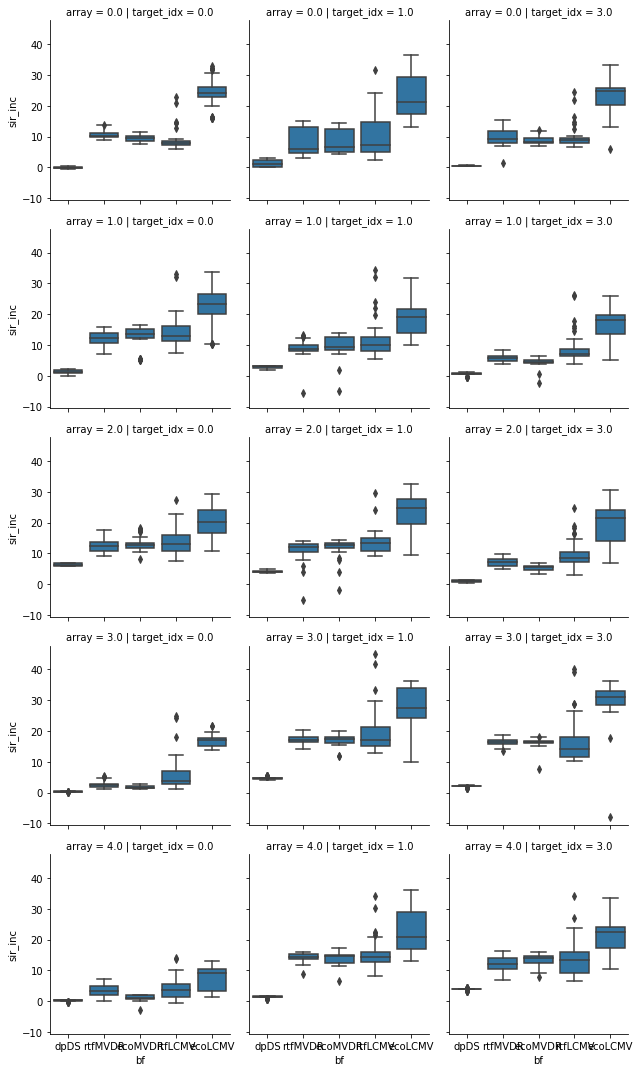

In [71]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'sir_inc')

/home/ddicarlo/Documents/Code/InProgress/2019@Barilan_dataset_dechorate/venv/lib/python3.6/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


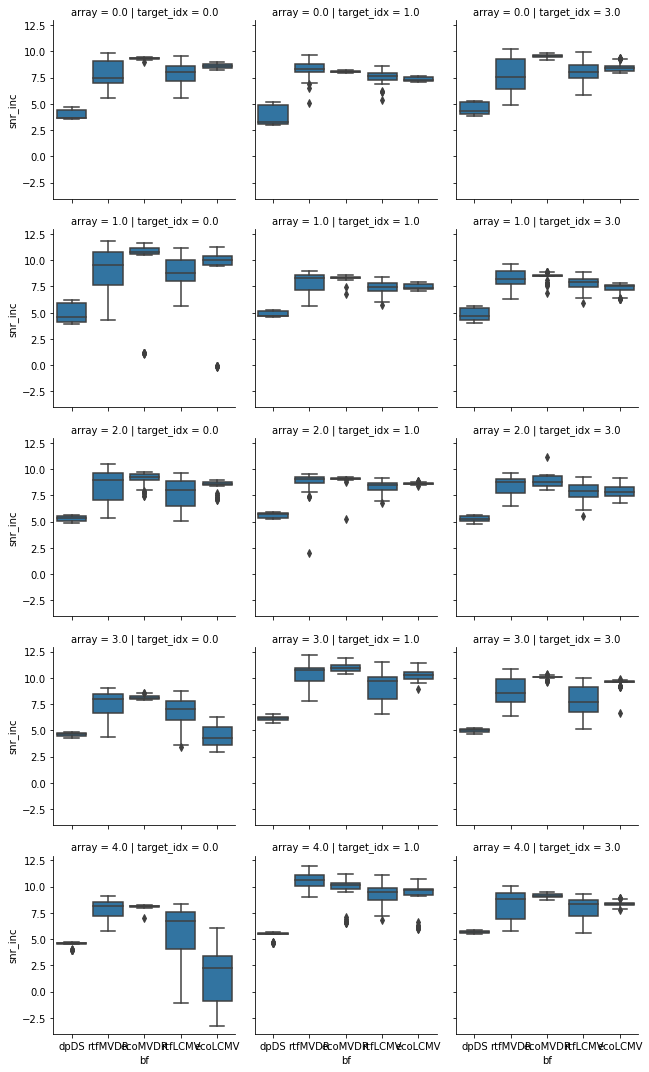

In [72]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'snr_inc')

In [ ]:
# filter
loc_res = results.copy()
# plot
plt.figure(figsize=(16,4))
plt.subplot(141)
sns.boxplot(x='array', y="sir_out", hue='bf'
            data=loc_res)
plt.subplot(142)
sns.boxplot(x='bf', y="snr_out",
            data=loc_res)
plt.subplot(143)
sns.boxplot(x='bf', y="sar_out",
            data=loc_res)
plt.subplot(144)
sns.boxplot(x='bf', y="pesq_out",
            data=loc_res)
plt.show()